In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats


In [2]:
def group_df(df, cols):
    df_group = df.groupby(cols).mean().copy()
    return df_group

In [3]:
filename = ! ls HR*.xlsx
df_hr = pd.read_excel(filename[0])

In [4]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp_Id                 14999 non-null  object 
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   Department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [6]:
df_hr.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


## Plot idea 1:
Show management has stayed with company the longest

In [7]:
dep_time = df_hr.groupby("Department").mean()["time_spend_company"]

<BarContainer object of 10 artists>

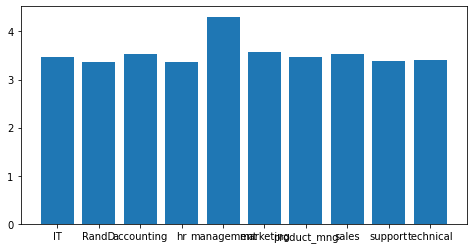

In [8]:
fig, ax = plt.subplots(1,1,figsize = (8,4))
ax.bar(dep_time.index, height = dep_time)

## Plot idea 2:
Show that accounting and hr are the safest jobs (marginally)

In [9]:
acc_rate = df_hr.groupby("Department").mean()["Work_accident"]


<BarContainer object of 10 artists>

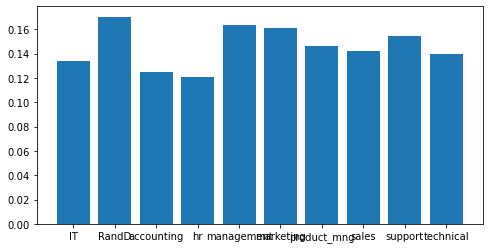

In [10]:
fig, ax = plt.subplots(1,1,figsize = (8,4))
ax.bar(acc_rate.index, height = acc_rate)

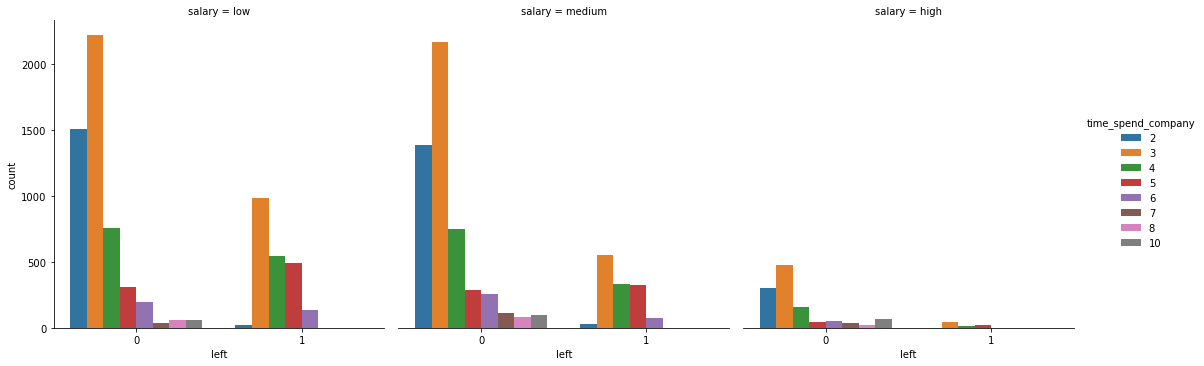

In [11]:
ax = sns.catplot(x = "left", hue = "time_spend_company",col = "salary", data = df_hr, kind = "count")
for ax_num in [1,2]: 
    ax.axes[0][ax_num].spines["left"].set_visible(False)
    ax.axes[0][ax_num].tick_params(which = "both", left = False)
# ax.suptitle("Employee's with low salaries and and spend a short time with the company left faster")

## Plot idea 3:
Show significantly lower satisfaction level among those who left/ Show lower promotion rate among those who left

In [12]:
df_group = df_hr.groupby(["left"]).mean().copy()

for col in df_group.columns:
    print(df_group[col])

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64
left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64
left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64
left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64
left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64


In [13]:
df_dep = group_df(df_hr, ["left"])
df_dep.round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [14]:
# import dataframe_image as dfi
# dfi.export(df_dep.round(2)["satisfaction_level","number_project",
#                            "average_montly_hours","time_spend_company",
#                            "Work_accident"],"mytable.png")


In [15]:
# for colname in df_hr.columns:
#     df_tmp = group_df(df_hr, [colname])
#     if colname not in ["left", "Emp_Id"]:
#         print(df_tmp["left"])

## Why I didn't pursue work accident and left:
Could not find an "explanation" of why work accident rate was higher among those who stayed, after looking at work accident rate grouped by all other columns. Would havel limited visualization to a simple bar chart.

# Commute EDA

Notes: Use multivariate graphs to show counts, x = time spent commuting, y = % left
- Heatmap? need another variable
    - x = time spent commuting
    - y = ?
        - Try average montly hours because it would show how much time they spend on work overall
        - satisfaction level: maybe longer commute times lead to higher expectations from work
    - color = % left
    - annotation in box = counts
- Bubble plot?

In [16]:
# Bins by 10 hrs
df_hr["avg_weekly_hrs"] = pd.cut(df_hr["average_montly_hours"]/4, bins = np.arange(20,90,10))
df_hr["time_spend_company_bin"] = pd.cut(df_hr["time_spend_company"], bins = np.arange(0,11,1))

# Bins by 5 hrs
# df_hr["avg_weekly_hrs"] = pd.cut(df_hr["average_montly_hours"]/4, bins = [0,30,35,40,45,50,55,60,65,70,75,80])

# df_hr["satisfaction_level_bin"] = pd.cut(df_hr["satisfaction_level"], bins = np.arange(0,1.25,0.25))

In [17]:
heat_var = ["avg_weekly_hrs", "time_spend_company", "left"]
# heat_var = ["avg_weekly_hrs", "satisfaction_level_bin", "left"]

In [18]:
df_commute = df_hr[heat_var].groupby(heat_var[:2]).agg([np.mean, len])

In [19]:
index = pd.MultiIndex.from_tuples(df_commute.index, names = heat_var[:2])

In [20]:
df_com_reindex = df_commute.reindex(index)

In [21]:
df_heatmap = df_com_reindex.unstack()["left"].iloc[::-1]

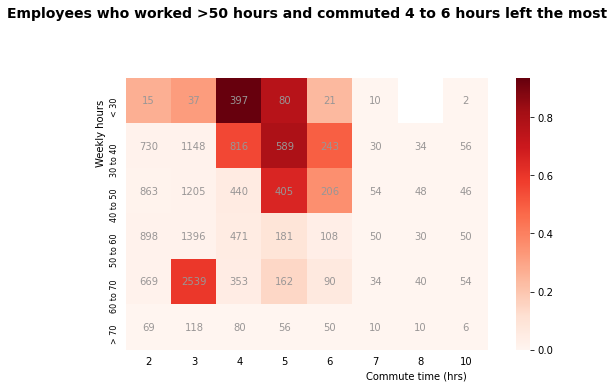

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,1, figsize = (10,5))
cbar_ax = None
# Draw heat map
ax = sns.heatmap(df_heatmap["mean"],annot = df_heatmap["len"].fillna(0), 
                 linewidths = 0, 
                 annot_kws = {"color":"#999696"}, fmt = "g", 
                 cmap = "Reds", cbar_ax = cbar_ax, square = True)
# Remove ticks
for axis in ["x","y"]:
    ax.tick_params(which = "both", axis = axis, width = 0)
    
ax.set_yticklabels(["< 30", "30 to 40", "40 to 50", "50 to 60", "60 to 70", "> 70"], rotation = 90, y = 1) 

# Title
ax.set_title("Employees who worked >50 hours and commuted 4 to 6 hours left the most", 
            horizontalalignment = "center", y = 1.2, weight = "bold", fontsize = 14)
    
# Xlabel
ax.set_xlabel("Commute time (hrs)", x = 0.8)
ax.set_ylabel("Weekly hours", y = 0.8)

for tick in ax.get_yticklabels():
    tick.set_fontsize(8)
# Remove ticks cbar
# divider = make_axes_locatable(ax) 
# cax = divider.append_axes("right", size="5%", pad=0.1) 
# cbar = plt.colorbar(ax.collections[0], cax=cax)
# cbar.set_ticks(np.linspace(0,1,6) * 100)

## Just a bar plot

In [23]:
df_hr["avg_weekly_hrs"] = pd.cut(df_hr["average_montly_hours"]/4, bins = np.arange(20,81,10
                                                                                  ))
df_weekly_left = df_hr.groupby("avg_weekly_hrs").mean()["left"]

In [24]:
df_weekly_left

avg_weekly_hrs
(20, 30]    0.000000
(30, 40]    0.399391
(40, 50]    0.025754
(50, 60]    0.120600
(60, 70]    0.292924
(70, 80]    0.806050
Name: left, dtype: float64

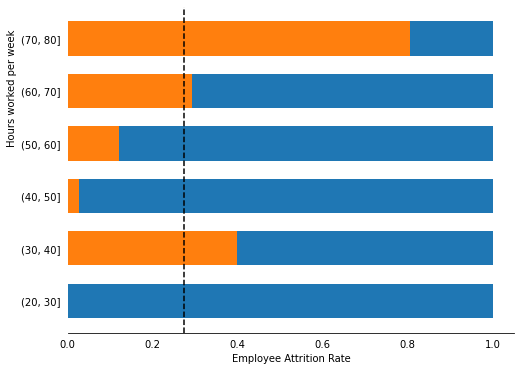

In [25]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
# Set labels
ax.set_xlabel("Employee Attrition Rate", y = -1)
ax.set_ylabel("Hours worked per week", y = 0.75)
# Plot bars
ax.barh(np.arange(len(df_weekly_left)), df_weekly_left.values, color = "tab:orange", height = 0.65)
ax.barh(np.arange(len(df_weekly_left)), 1 - df_weekly_left.values, left =df_weekly_left.values, color = "tab:blue", height = 0.65)

# Set y ticks
ax.set_yticks(range(len(df_weekly_left)))
ax.set_yticklabels(df_weekly_left.index.values) # THESE ARE MISLABELED, ADD MORE 
ax.tick_params(which = "both",axis = "y", width = 0)
ax.tick_params(which = "both",axis = "x", width = 0)

# ax.set_xticklabels([str(int(num*100)) + "%" for num in np.arange(0,1.2,0.2)])

# 
ax.axvline(df_weekly_left.mean(), color = "black", linestyle = "--")

for pos in ["top", "right", "left"]:
    ax.spines[pos].set_visible(False)

### Idea: Shift bar chart so it is centered at median/mean

In [26]:
df_weekly_left

avg_weekly_hrs
(20, 30]    0.000000
(30, 40]    0.399391
(40, 50]    0.025754
(50, 60]    0.120600
(60, 70]    0.292924
(70, 80]    0.806050
Name: left, dtype: float64

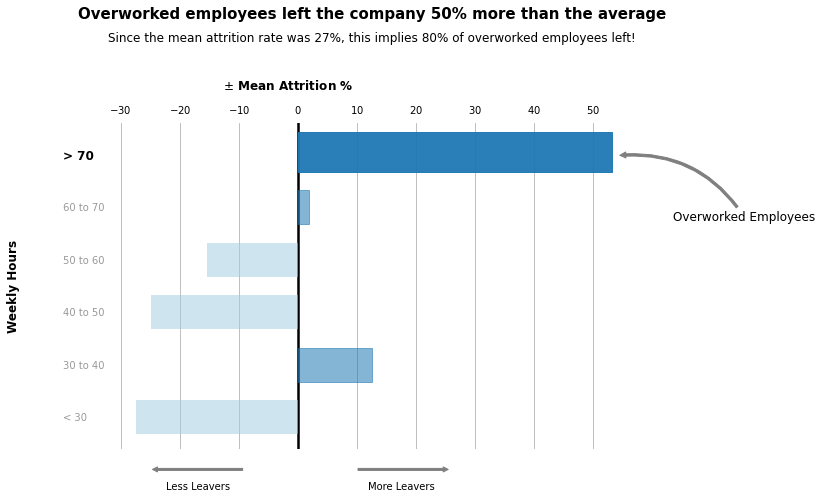

In [27]:
fig, ax = plt.subplots(1,1, figsize = (9,6))
median = df_weekly_left.median()
hr_mean = df_weekly_left.mean()

more = (df_weekly_left - hr_mean)
more = more[more > 0]

less = df_weekly_left - hr_mean
less = less[less <= 0]
color_more = "#1F78B4"
color_less = "#A6CEE3"

# Set title
# fig.suptitle("HEllo")
title = ax.set_title("Overworked employees left the company 50% more than the average", 
            weight = "bold", fontsize = 15, y = 1.3)
title_coords = title.get_position()
# Transforms coordinates so that bottom right is at 0,0
ax.text(s = f"Since the mean attrition rate was {hr_mean:.0%}, this implies 80% of overworked employees left!",
        x = title_coords[0], 
        y = title_coords[1] - 0.05, transform=ax.transAxes, horizontalalignment = "center",
       fontsize = 12)

# Set labels
ax.set_xlabel("$\pm$ Mean Attrition %", x = 0.35, fontsize = 12,weight = "bold")
ax.set_ylabel("Weekly Hours",fontsize = 12,weight = "bold", x = -0.3)
ax.xaxis.set_label_coords(1/3, 1.1)
ax.yaxis.set_label_coords(x = -0.2, y = 0.5)
# ax.set_ylabel("Hours worked per week", y = .75, rotation = 90, horizontalalignment = "center")

# Create x grid lines
ax.grid(which = "both", axis = "x")

# Make 0 gridline darker
for i, line in enumerate(ax.get_xgridlines()):
    if i == 3:
        line.set_linewidth(2.5)
        line.set_color("black")
    

# Set gridlines below bars
ax.set_axisbelow(True)
# Plot bars
ax.barh(np.arange(len(df_weekly_left)), df_weekly_left.values - hr_mean, height= 0.65, alpha = 0.55,
       color = color_less)

# Set y ticks
ax.set_yticks(range(len(df_weekly_left)))
ax.set_yticklabels(["< 30", "30 to 40", "40 to 50", "50 to 60", "60 to 70", "> 70"], ha = "left", x = -0.1) 
ax.tick_params(which = "both",axis = "y", width = 0)

# Bold 70 to 80 in y axis
for tick in ax.get_yticklabels():
    if tick.get_text() == "> 70":
        tick.set_weight("bold")
        tick.set_fontsize(12)
    else:
        tick.set_alpha(0.4)
        
# Bold 50 on x axis
for tick in ax.get_xticklabels():
    tick.set_fontweight("bold")
#     print(tick.get_text())
    if tick.get_text() == "$50$" :
        tick.set_weight("bold")
        tick.set_fontsize(12)

# Set x ticks
x_tick_range = np.arange(-0.3,0.61,0.1).round(2)
ax.set_xticks(x_tick_range)
# ax.set_xticklabels(["$" + str(int(num*100)) + "$" if num in [-0.3,0,0.5] else "" for num in x_tick_range ])
ax.set_xticklabels(["$" + str(int(num*100)) + "$" for num in x_tick_range ])
ax.tick_params(which = "both",axis = "x", width = 0, color = "grey")


# 
# ax.axvline(df_weekly_left.median(), color = "red", linestyle = "--")

for pos in ["bottom", "right", "left", "top"]:
    ax.spines[pos].set_visible(False)
ax.spines["top"].set_linewidth(2)
    
# Highlight 70 hour rectanle
max_width = max([rect.get_width() for rect in ax.patches])
for i, rect in enumerate(ax.patches):
    if rect.get_width() > 0: # Set color of positive attrition rates
        rect.set_color(color_more)
    if rect.get_width() == max_width: # Highlight highest attrition rate
#         rect.set_color(tab:red")
        rect.set_alpha(0.95)
        rect.set_height(0.75)

# Set xlim to center axis at 0
ax.set_xlim(xmin = -abs(x_tick_range.min()), xmax = abs(x_tick_range.max() - 0.05))

# Set gridlines

ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

# Add arrow annotations #TODO: Fix the x positions
ax.annotate("More Leavers", xy = (10/16,-2/16), xycoords = "axes fraction", 
            horizontalalignment = "right")
ax.annotate("Less Leavers", xy = (3.5/16,-2/16), xycoords = "axes fraction", 
            horizontalalignment = "right")

ax.annotate("", xy = (0.95/16,-1/16), xytext = (3.95/16,-1/16), xycoords = "axes fraction", 
            arrowprops = {"arrowstyle":"simple", "color": "tab:grey"})

ax.annotate("", xy = (10.5/16,-1/16), xytext = (7.5/16,-1/16), xycoords = "axes fraction", 
            arrowprops = {"arrowstyle":"simple",
                         "color": "tab:grey"})

# Annotate overworkers
ax.annotate("Overworked Employees",xy = (0.99,0.9), xytext = (1.1, 0.7), xycoords = "axes fraction", 
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.3", color = "tab:grey"), color = "black", fontsize = 12)
n_lines = len(ax.get_xticks()) + 0.5
xlim_size = 0.85
# props = dict(boxstyle='round', color = "tab:green", alpha=0.5)
# ax.text(0.05, 0.95, s = " ", transform=ax.transAxes, bbox=props)
norm_length = xlim_size / n_lines



In [28]:
# fig.savefig("weekly_hrs_vs_attrition", bbox_inches = 'tight', facecolor = "w")

# Bubble Chart (Does not look good)

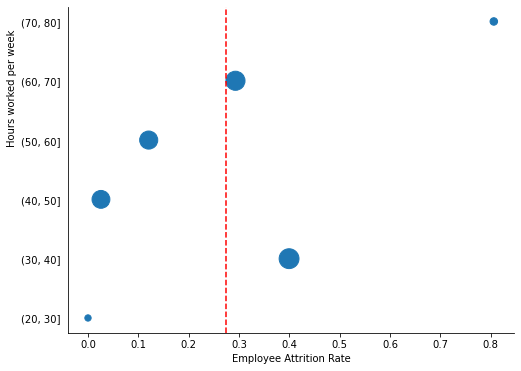

In [29]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

# Bubble sizes as counts
count = df_hr.groupby("avg_weekly_hrs").count()["left"]
# Set labels
ax.set_xlabel("Employee Attrition Rate", y = -1)
ax.set_ylabel("Hours worked per week", y = .75)
# Plot bars
ax.scatter(x = df_weekly_left, y = range(len(df_weekly_left)), sizes =count/10)

# Set y ticks
ax.set_yticks(range(len(df_weekly_left)))
ax.set_yticklabels(df_weekly_left.index.values) # THESE ARE MISLABELED, ADD MORE 
ax.tick_params(which = "both",axis = "y", width = 0)

# ax.set_xticklabels([str(int(num*100)) + "%" for num in np.arange(0,1.2,0.2)])

# 
ax.axvline(df_weekly_left.mean(), color = "red", linestyle = "--")

for pos in ["top", "right"]:
    ax.spines[pos].set_visible(False)

## Heat map... is this necessary?

Observations:
- Employees who worked <30 hours or commute more than 7 hours were dedicated to the job
- Employees who worked >75 hours all left


## Is it the ratio of commute to work that determines if you leave?

In [30]:
df_hr["work_comm_ratio"] = (df_hr["average_montly_hours"]/4)/(df_hr["time_spend_company"]*5)

In [31]:
df_hr["work_comm_ratio_bin"] = pd.cut(df_hr["work_comm_ratio"], bins = np.arange(0,11,1))

In [32]:
df_hr.groupby("work_comm_ratio_bin").mean()["left"]

work_comm_ratio_bin
(0, 1]     0.000000
(1, 2]     0.082899
(2, 3]     0.443587
(3, 4]     0.233377
(4, 5]     0.019731
(5, 6]     0.019585
(6, 7]     0.016438
(7, 8]     0.266667
(8, 9]          NaN
(9, 10]         NaN
Name: left, dtype: float64

## Try a clustermap

In [33]:
# fig, ax = plt.subplots(1,1, figsize = (8,8))
# ax = sns.clustermap(df_heatmap["mean"].fillna(0))

In [34]:
# # Show who works <40 hrs a week, 50-60, 60-70, 70-80, 80-90
# lower = 0
# for upper in [120, 160,200,240, 280, 320, 360]:
#     print(lower/4, " to ", upper/4)
#     print(df_hr.query("(average_montly_hours < @upper) & (average_montly_hours >= @lower)").__len__(), "\n")
#     lower = upper

In [35]:
df_hr.corr()["time_spend_company"]

satisfaction_level      -0.100866
last_evaluation          0.131591
number_project           0.196786
average_montly_hours     0.127755
time_spend_company       1.000000
Work_accident            0.002120
left                     0.144822
promotion_last_5years    0.067433
work_comm_ratio         -0.679182
Name: time_spend_company, dtype: float64

<AxesSubplot:>

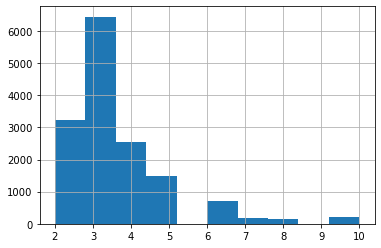

In [36]:
df_hr["time_spend_company"].hist()

## Bar chart: Does not show counts in each bar naturally

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%config InlineBackend.figure_format = 'retina' 

In [38]:
# read and fix variable dtypes
df_hr = pd.read_excel('HR_Employee_Data.xlsx',
                      dtype={
                          'Department': 'category',
                          'salary': 'category',
                          'left': 'category',
                          'Work_accident': 'category',
                          'promotion_last_5years': 'category',
                      }
                     )

### Variable description:

- **Emp_Id**: Id of Employee
- **satisfaction_level**: Satisfaction level of employee in percentage. 100% or 1 is very satisfied. 0% or 0 is not satisfied
- **last_evaluation**: Time from last evaluation in years
- **number_project**: Number of projects an employee is working on
- **average_montly_hours**: Average hours worked by employee in last 3 months
- **time_spend_company**: Time spent by employee commuting to office
- **Work_accident**: If the employee was involved in a work accident
- **left**: If the employee has left the company
- **promotion_last_5years**: If the employee has a promotion in past 5 years
- **Department**: Department employee is working in
- **salary**: Employee salary level

In [39]:
df_hr.head(3).T

,0,1,2
Emp_Id,IND02438,IND28133,IND07164
satisfaction_level,0.38,0.8,0.11
last_evaluation,0.53,0.86,0.88
number_project,2,5,7
average_montly_hours,157,262,272
time_spend_company,3,6,4
Work_accident,0,0,0
left,1,1,1
promotion_last_5years,0,0,0
Department,sales,sales,sales


In [40]:
# check dtypes
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Emp_Id                 14999 non-null  object  
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   Work_accident          14999 non-null  category
 7   left                   14999 non-null  category
 8   promotion_last_5years  14999 non-null  category
 9   Department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(5), float64(2), int64(3), object(1)
memory usage: 777.1+ KB


In [41]:
# check nulls
df_hr.isnull().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

-----

Check unique values of cateogrical variables

In [42]:
df_hr['Department'].unique()

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['sales', 'accounting', 'hr', 'technical', ..., 'IT', 'product_mng', 'marketing', 'RandD']

In [43]:
df_hr['salary'].unique()

['low', 'medium', 'high']
Categories (3, object): ['low', 'medium', 'high']

In [44]:
df_hr['salary'].cat.codes

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Length: 14999, dtype: int8

In [45]:
df_hr['salary'] = df_hr['salary'].cat.as_ordered()
df_hr['salary'] = df_hr['salary'].cat.reorder_categories(['low', 'medium', 'high'])
df_hr['salary']

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [46]:
df_hr['left'].unique()

[1, 0]
Categories (2, int64): [1, 0]

In [47]:
df_hr['Work_accident'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [48]:
df_hr['promotion_last_5years'].unique()

[0, 1]
Categories (2, int64): [0, 1]

----

Describle data of numerical variables

In [49]:
df_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


## Explore 'number_project' and target variable, 'left'

In [50]:
# exploring  'number_project' and 'left'
num_prj = df_hr['number_project']
tar = df_hr['left']

In [51]:
num_prj.unique()

array([2, 5, 7, 6, 4, 3])

In [52]:
num_prj_median = num_prj.median()
num_prj_median

4.0

In [53]:
tab_num_prj = pd.crosstab(index=num_prj, columns='count')
tab_num_prj

col_0,count
number_project,
2,2388
3,4055
4,4365
5,2761
6,1174
7,256


In [54]:
# see how many people left by number of projects they worked on
num_left_with_num_proj = df_hr.groupby(['number_project', 'left']).count()['average_montly_hours']
num_left_with_num_proj

number_project  left
2               0        821.0
                1       1567.0
3               0       3983.0
                1         72.0
4               0       3956.0
                1        409.0
5               0       2149.0
                1        612.0
6               0        519.0
                1        655.0
7               0          NaN
                1        256.0
Name: average_montly_hours, dtype: float64

In [55]:
pd.crosstab([df_hr['number_project'], df_hr['left']], columns='percentage')#, normalize='columns')

col_0                percentage
number_project left            
2              0            821
               1           1567
3              0           3983
               1             72
4              0           3956
               1            409
5              0           2149
               1            612
6              0            519
               1            655
7              1            256

In [56]:
left_w_prj = num_left_with_num_proj.loc[:, 1].values  # make array of number that left by number of projects [column1, column2]
stayed_w_prj = num_left_with_num_proj.loc[:, 0].values  # make array of number that stayed by number of projects [column1, column2]
left_w_prj, stayed_w_prj, left_w_prj.sum()/ (left_w_prj.sum() + stayed_w_prj.sum())

(array([1567.,   72.,  409.,  612.,  655.,  256.]),
 array([ 821., 3983., 3956., 2149.,  519.,   nan]),
 nan)

-----------

In [57]:
# 2 and 7 projects
(left_w_prj[0] + left_w_prj[-1]) / left_w_prj.sum()

0.5105012601512181

Over 50% of employees who left were either working on 2 or 7 projects.



In [58]:
(left_w_prj[0] + left_w_prj[-1]  + left_w_prj[-2]) / left_w_prj.sum()

0.693923270792495

69% of employees who left were working 2, 6, or 7 projects at a time.

In [59]:
(left_w_prj[1] + left_w_prj[2] + left_w_prj[3]) / left_w_prj.sum()

0.3060767292075049

30% of employees who left had 3, 4, 5 projects

In [60]:
1-(left_w_prj[1] / left_w_prj.sum())

0.9798375805096612

2% of employees who left had 3 projects

In [61]:
(left_w_prj[1]+left_w_prj[2]) / left_w_prj.sum()

0.13469616353962474

--------

I think a good plot to compare these left and stayed with num projects is a stacked percent bar plot

In [62]:
# data for proportion data
total = left_w_prj + stayed_w_prj
left_w_prj_proportion = left_w_prj / total
stayed_w_prj_proportion = stayed_w_prj / total
total

array([2388., 4055., 4365., 2761., 1174.,   nan])

In [63]:
# make a df of proportion date
df_left_prj_pro = pd.DataFrame(
    {'left': left_w_prj_proportion,
     'stayed': stayed_w_prj_proportion},
     index=np.arange(6)+2,
      )
df_left_prj_pro.index.name='num projects'
df_left_prj_pro

,left,stayed
num projects,,
2,0.656198,0.343802
3,0.017756,0.982244
4,0.093700,0.906300
5,0.221659,0.778341
6,0.557922,0.442078
7,NaN,NaN


In [64]:
# data for visualization
total = left_w_prj + stayed_w_prj
left_w_prj_proportion = left_w_prj / total
stayed_w_prj_proportion = stayed_w_prj / total
x = np.arange(6) + 2

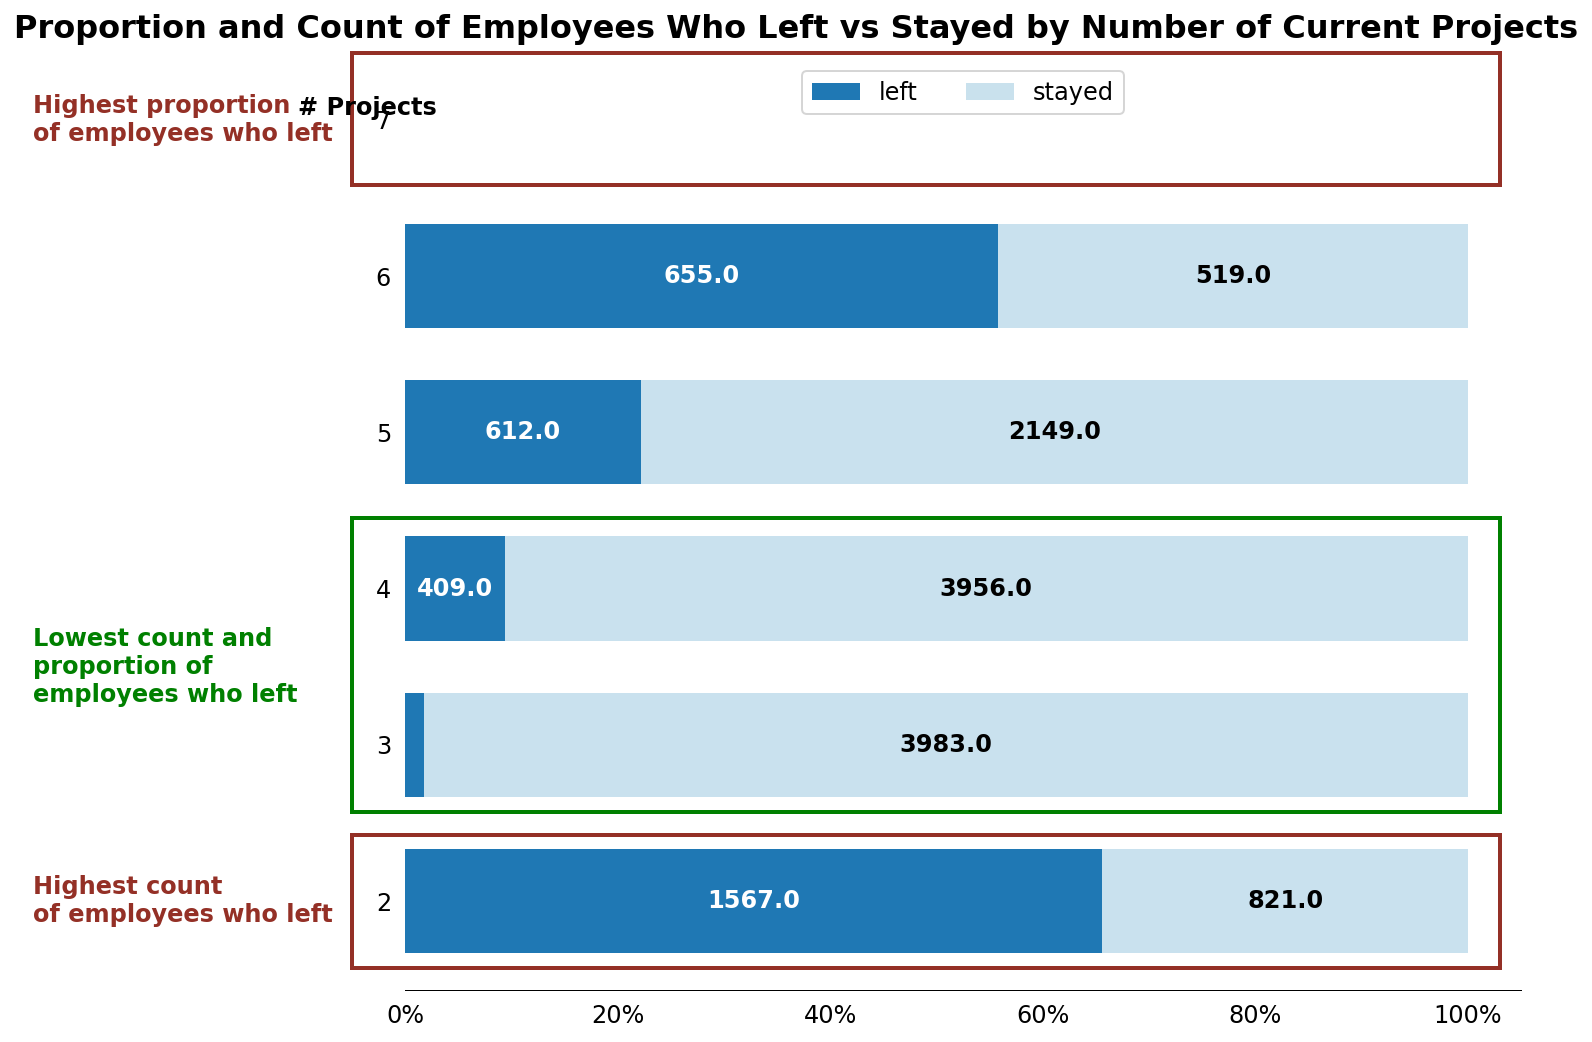

In [65]:
# horizontal barplot 2
fig, ax = plt.subplots(figsize=(10,8))

LEFT_C = '#1f78b4'
STAYED_C = '#a6cee3'
HIGHLIGHT_C = '#943026'

height = 2/3

# 'left' bar
left_bars = ax.barh(x,
            left_w_prj_proportion,
            height=height,
            color=LEFT_C,
            alpha=1,
            label='left',
        )
# 'stayed' bar
stayed_bars = ax.barh(x,
            stayed_w_prj_proportion,
            height=height,
            left=left_w_prj_proportion,
            color=STAYED_C,
            alpha=.6,
            label='stayed'
        )

# highlight low retention rate bars
left_bars[5].set_alpha(1)
left_bars[4].set_alpha(1)
left_bars[0].set_alpha(1)


# tick labels, label, and title
#ax.set_xlabel('Percent Left vs Stayed', size=12, weight='bold')
ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels(['0%','20%', '40%', '60%', '80%', '100%'], size=12)
ax.set_ylabel('# Projects', size=12, weight='bold', y=1, rotation=0)
ax.set_yticks(np.arange(6)+2)
ax.set_yticklabels([2,3,4,5,6,7], size=12)
ax.set_title('Proportion and Count of Employees Who Left vs Stayed by Number of Current Projects', y=1.08, x=-.35,fontsize=16, weight='bold', ha='left')
ax.tick_params(axis='y', left=False)
ax.tick_params(axis='x', bottom=False)

#ax.annotate('Total', (1,7.5), size=12, weight='bold', annotation_clip=False)

'''
# add total text
for i, bar in enumerate(left_bars):
    h = bar.get_height()
    x_bar = 1.015
    y_bar = bar.get_y() + h/2.2
    text = f'{total[i]}'
    ax.annotate(text, (x_bar,y_bar), size=12, annotation_clip=False)
''' 
 
# add count per bar for left
for i, bar in enumerate(left_bars):
    y_ct = bar.get_y()
    x_ct = bar.get_x()
    h_ct = bar.get_height()
    w_ct = bar.get_width()
    label = f"{left_w_prj[i]}"
    if i != 1:
        ax.annotate(label, (x_ct + w_ct/2, y_ct + h_ct/2), ha='center', va='center', size=12, color='white', weight='semibold')

# add count per bar for stayed
for i, bar in enumerate(stayed_bars):
    y_ct = bar.get_y()
    x_ct = bar.get_x()
    h_ct = bar.get_height()
    w_ct = bar.get_width()
    label = f"{stayed_w_prj[i]}"
    if i != 5:
        ax.annotate(label, (x_ct + w_ct/2, y_ct + h_ct/2), ha='center', va='center', size=12, color='black', weight='semibold')
        
# add vertical lines at x ticks
'''for vl_x in [0.2,0.4,0.6,0.8]:
    ax.axvline(x=vl_x, ymax=.952, alpha=.3, color='grey', lw=.5)'''
    
# add explaination text
ax.annotate('Highest proportion\nof employees who left', xy=(-.03,7), xycoords='data', xytext=(-.35,7), annotation_clip=False, ha='left', va='center', size=12, weight='bold', color=HIGHLIGHT_C)
ax.annotate('Highest count\nof employees who left', xy=(-.03,2), xycoords='data', xytext=(-.35,2), annotation_clip=False, ha='left', va='center', size=12, weight='bold', color=HIGHLIGHT_C)
ax.annotate('Lowest count and\nproportion of\nemployees who left', xy=(-.03,2.57), xycoords='data', xytext=(-.35,3.5), annotation_clip=False, ha='left', va='center', size=12, weight='bold', color='green')

# add highlighting patches
# 7 projects
ax.add_patch(
    patches.Rectangle(
        xy=(-.05, 6.58),
        height=.85,
        width=1.08,
        fill=False,
        color=HIGHLIGHT_C,
        clip_on=False,
        lw=2
    )
)
# 2 projects
ax.add_patch(
    patches.Rectangle(
        xy=(-.05, 1.57),
        height=.85,
        width=1.08,
        fill=False,
        color=HIGHLIGHT_C,
        clip_on=False,
        lw=2
    )
)
# 3 and 4 projects
ax.add_patch(
    patches.Rectangle(
        xy=(-.05, 2.57),
        height=1.88,
        width=1.08,
        fill=False,
        color='green',
        clip_on=False,
        lw=2
    )
)


# hide spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

ax.legend(loc=9, bbox_to_anchor=(.5,1.07), ncol=2, prop={'size':12})
plt.show()
#plt.savefig('num_project.png', bbox_inches='tight', padding=10)

## Distribution of number of projects by total, left, and stayed

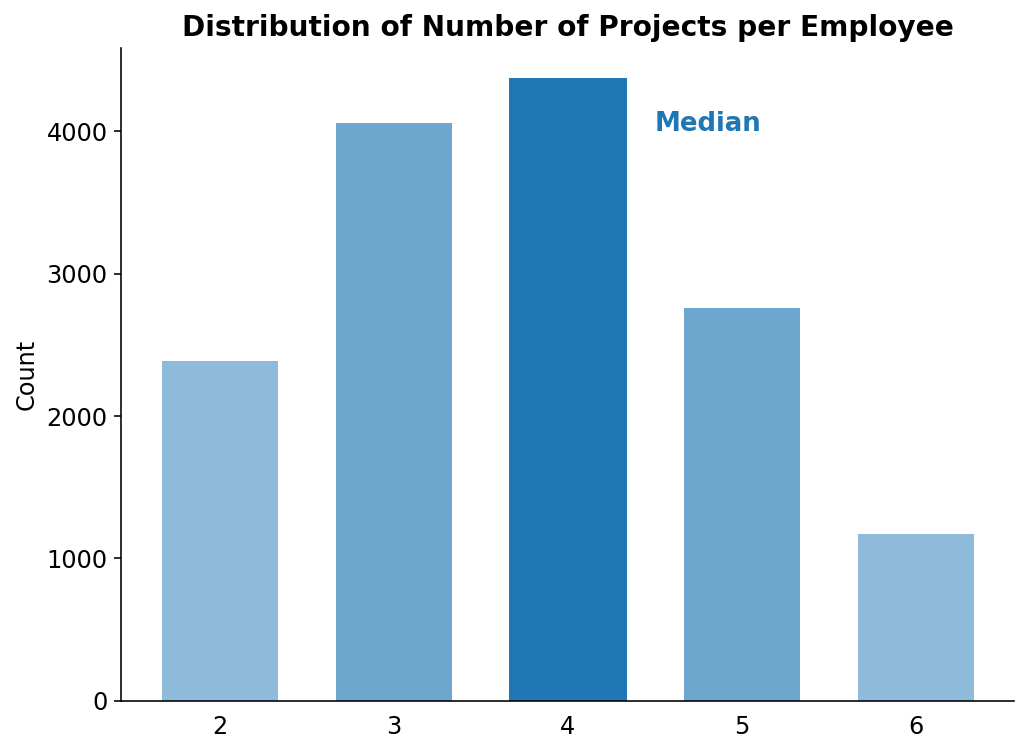

In [66]:
# total
fig, ax = plt.subplots(figsize=(8,6))

AVG_C = '#1f78b4'
OTHER_C = '#a6cee3'
HIGHLIGHT_C = '#943026'

bars = ax.bar(np.arange(6)+2, total, color=AVG_C, width=2/3)

bars[2].set_color(AVG_C)
bars[0].set_alpha(.5)
bars[1].set_alpha(.65)
bars[3].set_alpha(.65)
bars[4].set_alpha(.5)
bars[5].set_alpha(.5)

ax.set_title('Distribution of Number of Projects per Employee', size=14, weight='bold', ha='center')
ax.set_ylabel('Count', size=12)
ax.tick_params(axis='x', labelsize=12, bottom=False)
ax.tick_params(axis='y', labelsize=12)

ax.annotate('Median', xy=(4.5, 4000), weight='bold', size=13, color=AVG_C, ha='left')

#ax.axvline(num_prj_median)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [67]:
# table for distribution of projects
proj_dist = pd.crosstab(index=df_hr['number_project'], columns='Counts', colnames=['Number Projects'], rownames=[''])
proj_dist

Number Projects,Counts
,
2,2388
3,4055
4,4365
5,2761
6,1174
7,256


### Insight:

When the number of projects are low (2) or the number of projects are too high (over 5), the turnover rate is high. The turnover rate is the highest (100%) when employees have 7 projects and second highest when employees have 2 projects.

My recommendation based off this data is to keep the number of projects each employee at 3 to maximize retention rate.

## Comparing 'average_monthly_hours' and 'left'

In [68]:
df_hr['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [69]:
avg_hrs = df_hr.groupby('left').mean()['average_montly_hours']
max_hrs = df_hr.groupby('left').max()['average_montly_hours']
min_hrs = df_hr.groupby('left').min()['average_montly_hours']
avg_hrs, max_hrs, min_hrs

(left
 0    199.060203
 1    207.419210
 Name: average_montly_hours, dtype: float64,
 left
 0    287
 1    310
 Name: average_montly_hours, dtype: int64,
 left
 0     96
 1    126
 Name: average_montly_hours, dtype: int64)

In [70]:
# separate avg hours by left and stayed
df_avg_hrs_left = df_hr[df_hr['left'] == 1].copy()
avg_hrs_left = df_avg_hrs_left['average_montly_hours'] 

df_avg_hrs_stayed = df_hr[df_hr['left'] ==0].copy()
avg_hrs_stayed = df_avg_hrs_stayed['average_montly_hours']

type(avg_hrs_left), avg_hrs_stayed

(pandas.core.series.Series,
 2000     215
 2001     202
 2002     193
 2003     247
 2004     214
         ... 
 14206    259
 14207    266
 14208    185
 14209    172
 14210    180
 Name: average_montly_hours, Length: 11428, dtype: int64)

Text(0, 0.5, 'Count')

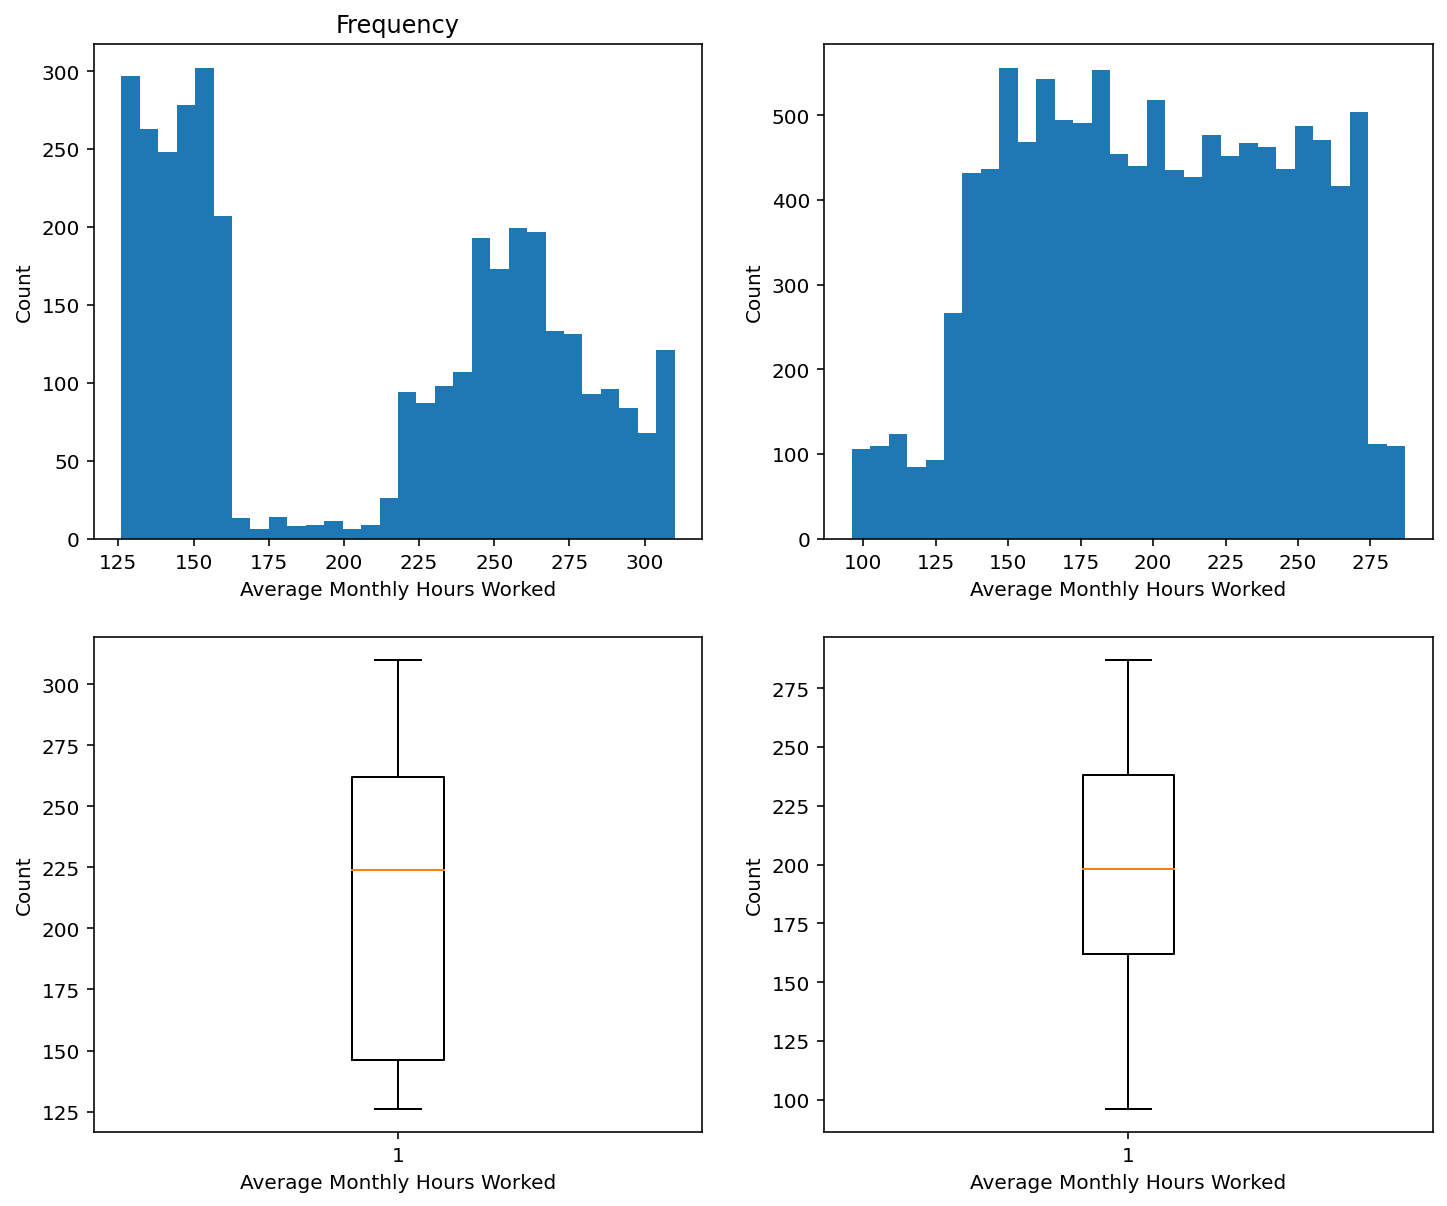

In [71]:
# create histogram and blox plots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
axes = axes.flatten()

# left = 1
axes[0].hist(avg_hrs_left, bins=30)
axes[2].boxplot(avg_hrs_left)

axes[0].set_xlabel('Average Monthly Hours Worked')
axes[0].set_ylabel('Count')
axes[0].set_title('Frequency')

axes[2].set_xlabel('Average Monthly Hours Worked')
axes[2].set_ylabel('Count')

# left = 0
axes[1].hist(avg_hrs_stayed, bins=30)
axes[3].boxplot(avg_hrs_stayed)

axes[1].set_xlabel('Average Monthly Hours Worked')
axes[1].set_ylabel('Count')

axes[3].set_xlabel('Average Monthly Hours Worked')
axes[3].set_ylabel('Count')

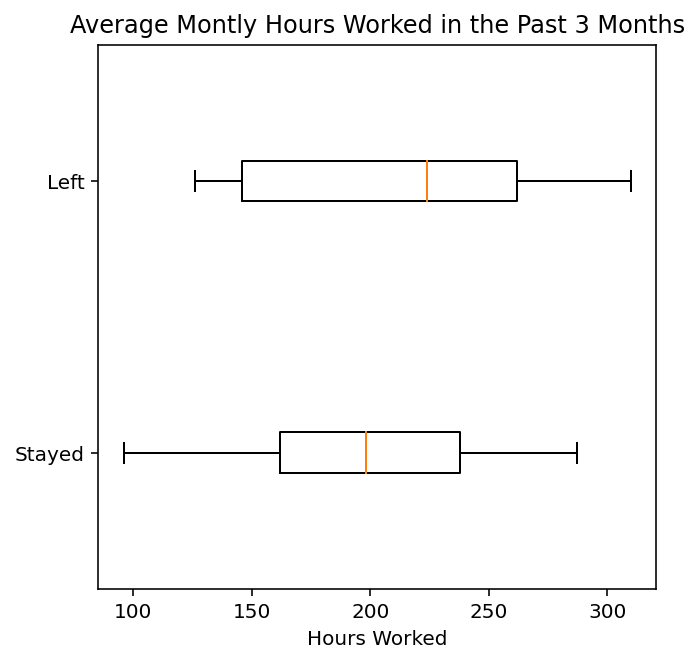

In [72]:
# side by side boxplot
fig, ax = plt.subplots(figsize=(5,5))

ax.boxplot([avg_hrs_stayed, avg_hrs_left], vert=False)
ax.set_yticks([1,2])
ax.set_yticklabels(['Stayed','Left'])
ax.set_xlabel('Hours Worked')
ax.set_title('Average Montly Hours Worked in the Past 3 Months')

plt.show()

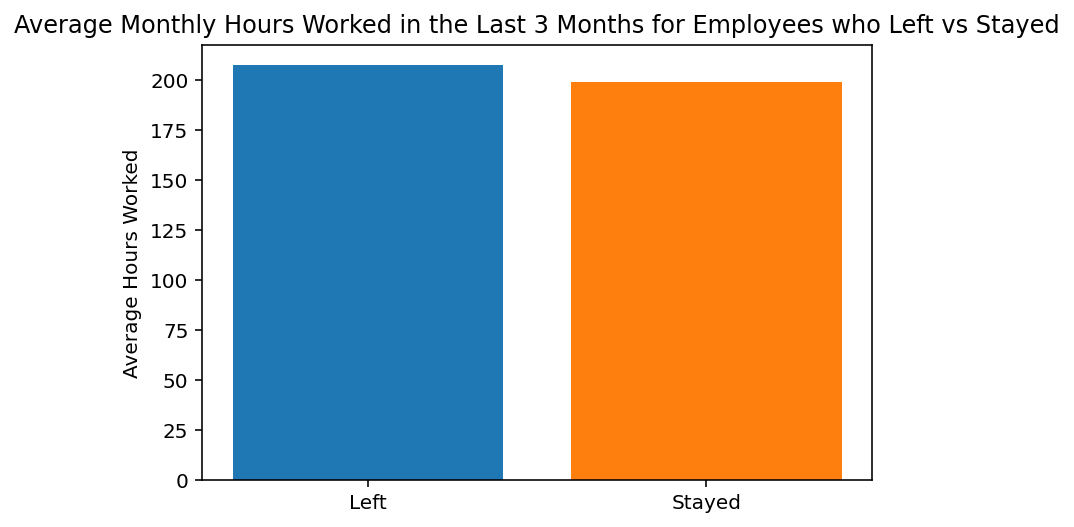

In [73]:
# bar chart
avg_left = avg_hrs_left.mean()
avg_stayed = avg_hrs_stayed.mean()

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(0, avg_left)
ax.bar(1, avg_stayed)

ax.set_xticks([0,1])
ax.set_xticklabels(['Left', 'Stayed'])
ax.set_ylabel('Average Hours Worked')
ax.set_title('Average Monthly Hours Worked in the Last 3 Months for Employees who Left vs Stayed')

plt.show()

In [74]:
diff = abs(avg_left - avg_stayed)
diff

8.359007295086116

In [75]:
# set x as monthly hrs and y as count of left = 1
left_per_hrs = df_avg_hrs_left.groupby('average_montly_hours').count()['left']
stayed_per_hrs = df_avg_hrs_stayed.groupby('average_montly_hours').count()['left']
left_per_hrs

average_montly_hours
126    10
127    57
128    47
129    47
130    42
       ..
306    18
307    14
308    20
309    16
310    18
Name: left, Length: 164, dtype: int64

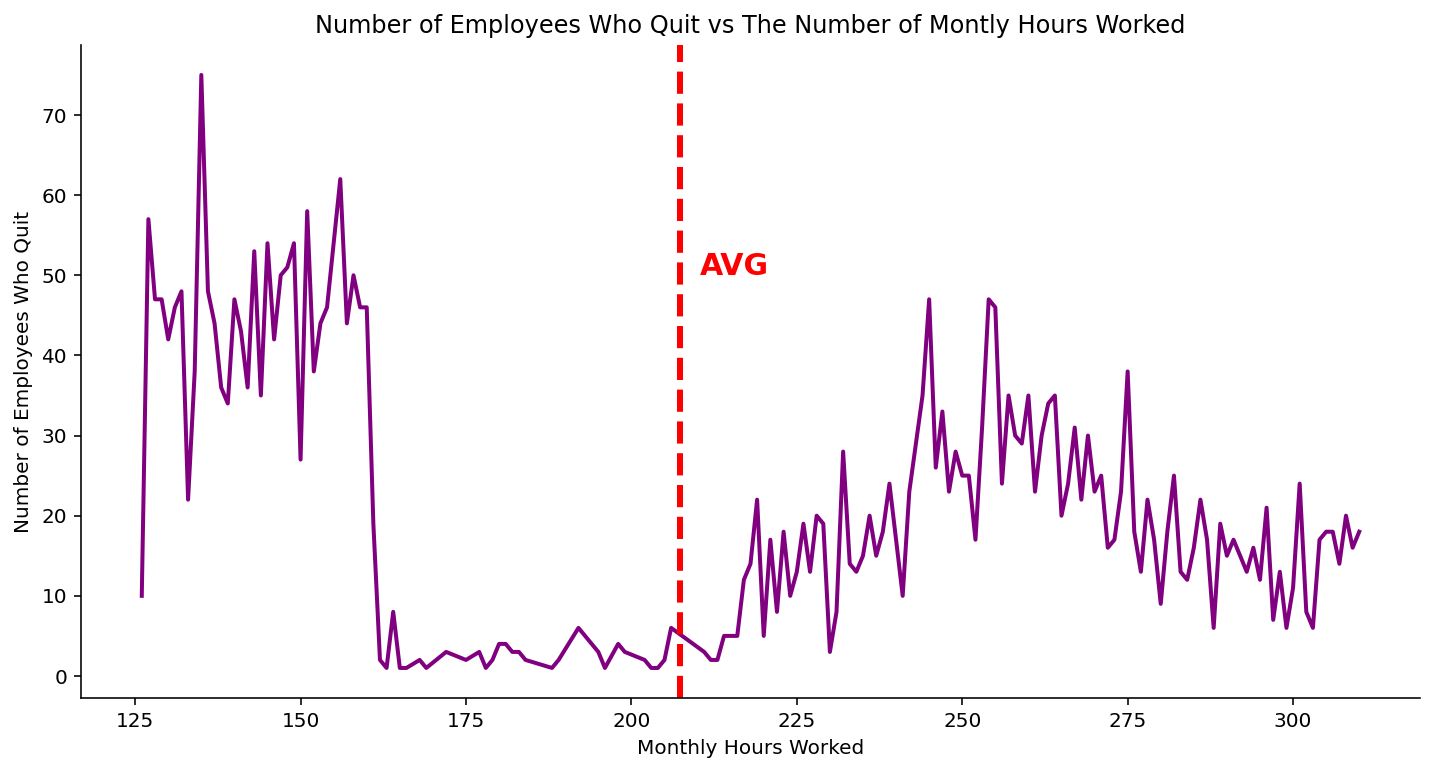

In [76]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(left_per_hrs, color='purple', lw=2, label='Quit')
ax.axvline(avg_left, color='red', lw=3, ls='dashed')
ax.annotate('AVG', (avg_left+3,50), size=15, weight='bold', color='red')

ax.set_xlabel('Monthly Hours Worked')
ax.set_ylabel('Number of Employees Who Quit')
ax.set_title('Number of Employees Who Quit vs The Number of Montly Hours Worked')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

### My Insight:

The number of employees who quit is lowest when they work on average, 160 to 215 hours per month.
The mean between the number of monthly hours of someone who quit and someone who stayed only has a difference of about 8 hours, which I don't think is too significant.

## num projects with respect to salary vs left

In [77]:
median_num_projects = np.median(df_hr['number_project'].values)

In [78]:
df_stay = df_hr[df_hr['left'] == 0].copy()

In [79]:
tab1 = pd.crosstab(index=[df_stay['number_project'], df_stay['salary'], df_stay['left']], columns='Count')
tab_series1 = tab1['Count']

In [80]:
s_low_count = np.array([tab_series1.iloc[i] for i, index in enumerate(tab1.index.values) if index[1] == 'low'])
s_med_count = np.array([tab_series1.iloc[i] for i, index in enumerate(tab1.index.values) if index[1] == 'medium'])
s_high_count = np.array([tab_series1.iloc[i] for i, index in enumerate(tab1.index.values) if index[1] == 'high'])
s_avg_count = s_high_count +s_med_count +s_low_count
s_avg_count= s_avg_count/3
s_avg_count = np.append(s_avg_count, 0)
s_avg_count

array([ 273.66666667, 1327.66666667, 1318.66666667,  716.33333333,
        173.        ,    0.        ])

In [81]:
df_left = df_hr[df_hr['left'] == 1].copy()
df_left.head(2)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium


In [82]:
tab = pd.crosstab(index=[df_left['number_project'], df_left['salary'], df_left['left']], columns='Count')
tab_series = tab['Count']

In [83]:
low_count = np.array([tab_series.iloc[i] for i, index in enumerate(tab.index.values) if index[1] == 'low'])
med_count = np.array([tab_series.iloc[i] for i, index in enumerate(tab.index.values) if index[1] == 'medium'])
high_count = np.array([tab_series.iloc[i] for i, index in enumerate(tab.index.values) if index[1] == 'high'])

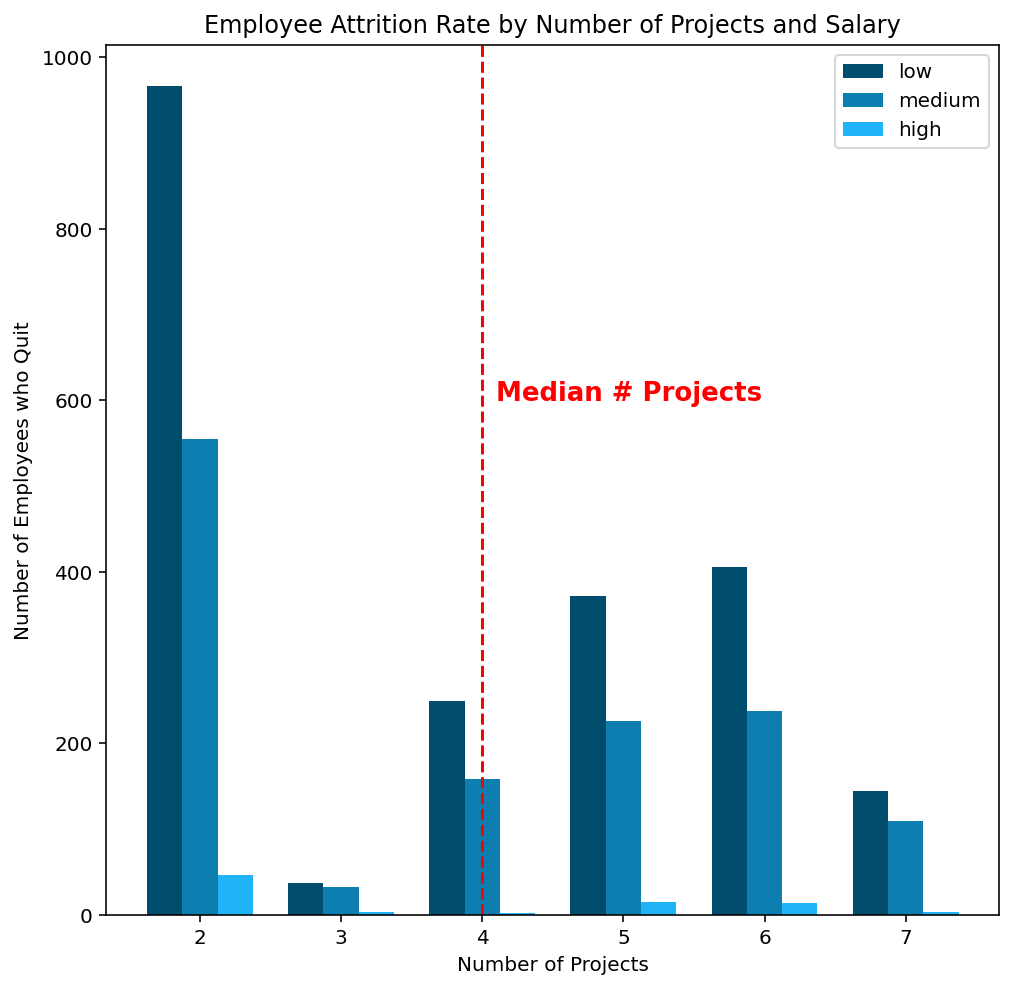

In [84]:
fig, ax = plt.subplots(figsize=(8,8))

w = .25
# low bar chart
ax.bar(np.arange(6)-w, low_count, width=w, label='low', color='#004c6d')
# med bar chart
ax.bar(np.arange(6), med_count, width=w, label='medium', color='#0e7eb0')
# high bar chart
ax.bar(np.arange(6)+w, high_count, width=w, label='high', color='#20b3f8')

ax.axvline(median_num_projects-2, ls='--', color='red')
ax.annotate('Median # Projects', (2.1, 600), size=13, color='red', weight='bold')
#ax.plot(np.arange(6), s_avg_count, color='green', ls='--', label='')


ax.set_ylabel('Number of Employees who Quit')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(np.arange(6)+2)
ax.set_xlabel('Number of Projects')
ax.set_title('Employee Attrition Rate by Number of Projects and Salary')



ax.legend()
plt.show()

## num project by sat level vs left

In [85]:
df_hr.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [86]:
df_hr['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [87]:
avg_sat = df_hr.groupby('number_project').mean()['satisfaction_level']
sorted(df_hr['number_project'].unique())

[2, 3, 4, 5, 6, 7]

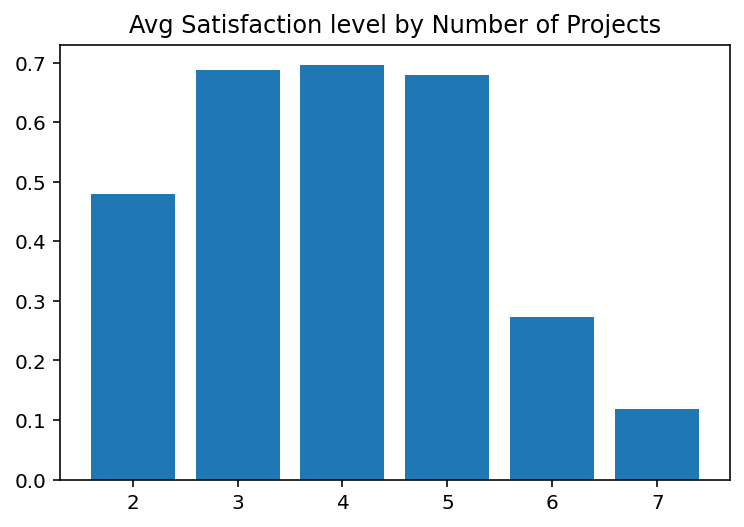

In [88]:
plt.title('Avg Satisfaction level by Number of Projects')
plt.bar(sorted(df_hr['number_project'].unique()), avg_sat)
plt.show()

In [89]:
##eda for column satisfaction_level and last_evaluation

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


##read the data
df_hr = pd.read_excel('HR_Employee_Data.xlsx',
                      dtype={
                          'Department': 'category',
                          'salary': 'category',
                          'Work_accident': 'category',
                          'promotion_last_5years': 'category',
                      }
                     )

print(df_hr.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Emp_Id                 14999 non-null  object  
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   Work_accident          14999 non-null  category
 7   left                   14999 non-null  int64   
 8   promotion_last_5years  14999 non-null  category
 9   Department             14999 non-null  category
 10  salary                 14999 non-null  category
dtypes: category(4), float64(2), int64(4), object(1)
memory usage: 879.5+ KB
None


0
0.000    0.09
0.001    0.09
0.250    0.44
0.500    0.64
0.750    0.82
0.999    1.00
1.000    1.00
Name: satisfaction_level, dtype: float64


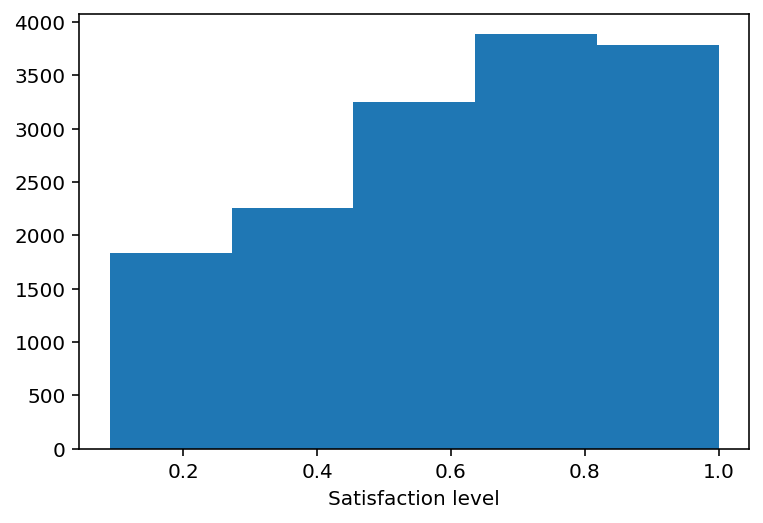

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64
-0.38837498342411353


In [90]:
##EDA for satisfaction_level 

##first lets check if there are NA values 

count= sum(df_hr['satisfaction_level'].isnull())
print(count)

##There are no NA values 

##now lets check the distribution, quantiles, and if there are extreme values 


##These quantiles look nomral given that this variable should be between 0 and 1 
print(df_hr['satisfaction_level'].quantile([.0, 0.001, 0.25, .5, 0.75, 0.999, 1]))



##histogram 
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_hr['satisfaction_level'], bins=5)
ax.set_xlabel("Satisfaction level")
plt.show()

##check summary stats 
print(df_hr['satisfaction_level'].describe())



##now we have check to make sure there are no NAs and no extreme values
##now lets start checking its relationship with the target

correlation = df_hr['satisfaction_level'].corr(df_hr['left']) 
print(correlation)

##The correlation is negative and weak: -0.38837498342411353





left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64


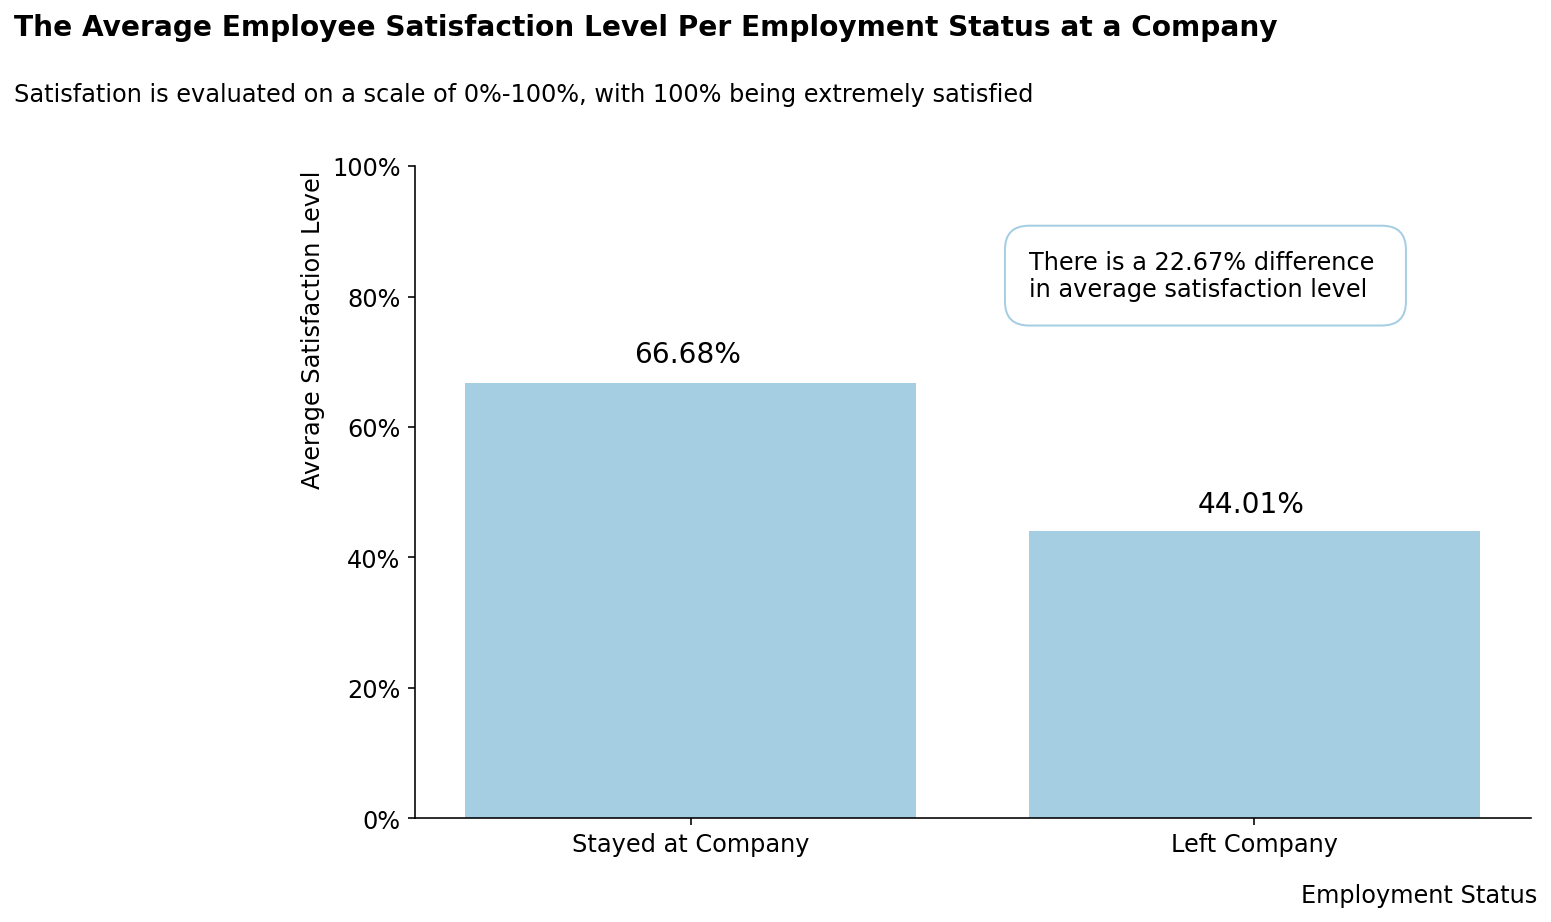

In [91]:
##Lets graph this now 

##graph average satisfaction_level for left vs stayed

import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

df_hr['left'] = df_hr.left.astype('category')
avg_satisfaction_level = df_hr.groupby('left').mean()['satisfaction_level']
print(avg_satisfaction_level)


fig, ax = plt.subplots(figsize=(10,6)) 
ax.bar(avg_satisfaction_level.index, avg_satisfaction_level, color="#A6CEE3")
plt.xlabel("Employment Status", size=12)
plt.ylabel("Average Satisfaction Level", size=12)

ax.set_ylim(0,1) 
ax.yaxis.set_label_coords(-0.08, 0.75)
ax.xaxis.set_label_coords(0.9, -0.1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 



ax.set_xticks([0,1])
ax.set_xticklabels(['Stayed at Company','Left Company'], size=12, color='black')
plt.yticks(fontsize=12 )
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.annotate("The Average Employee Satisfaction Level Per Employment Status at a Company", (-1.2, 1.2), size=14, annotation_clip=False, weight='bold')
ax.annotate("Satisfation is evaluated on a scale of 0%-100%, with 100% being extremely satisfied", (-1.2, 1.1), size=12, annotation_clip=False)

##label bars
ax.annotate("66.68%", (-.1, .7), size=14, annotation_clip=False)
ax.annotate("44.01%", (.9, .47), size=14, annotation_clip=False)

##Add text box
ax.text(.6, .8, 'There is a 22.67% difference \nin average satisfaction level', color='black', size=12, 
        bbox=dict(facecolor='none', edgecolor='#A6CEE3', boxstyle='round,pad=1'))

plt.show()

##seems like overall satisfaction level has a negative correlation with people leaving their job 
fig.savefig('SatisfcationVsLeft-Final4.pdf', bbox_inches='tight')


0
0.000    0.36
0.001    0.36
0.250    0.56
0.500    0.72
0.750    0.87
0.999    1.00
1.000    1.00
Name: last_evaluation, dtype: float64


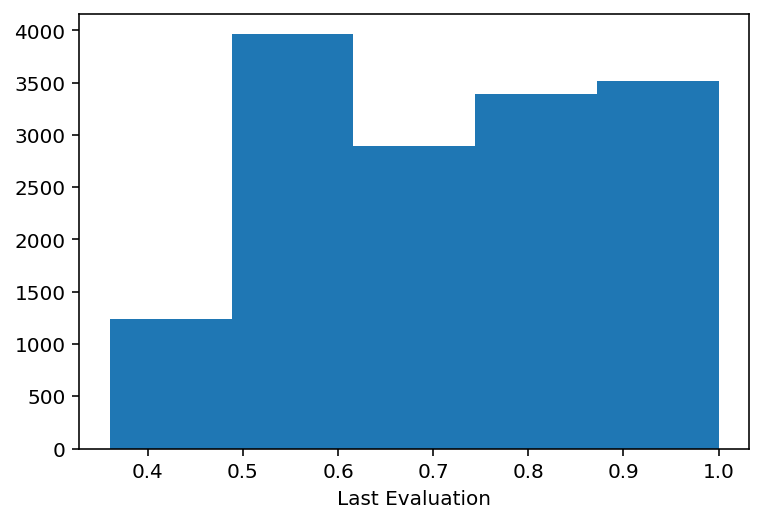

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64
0.006567120447534063


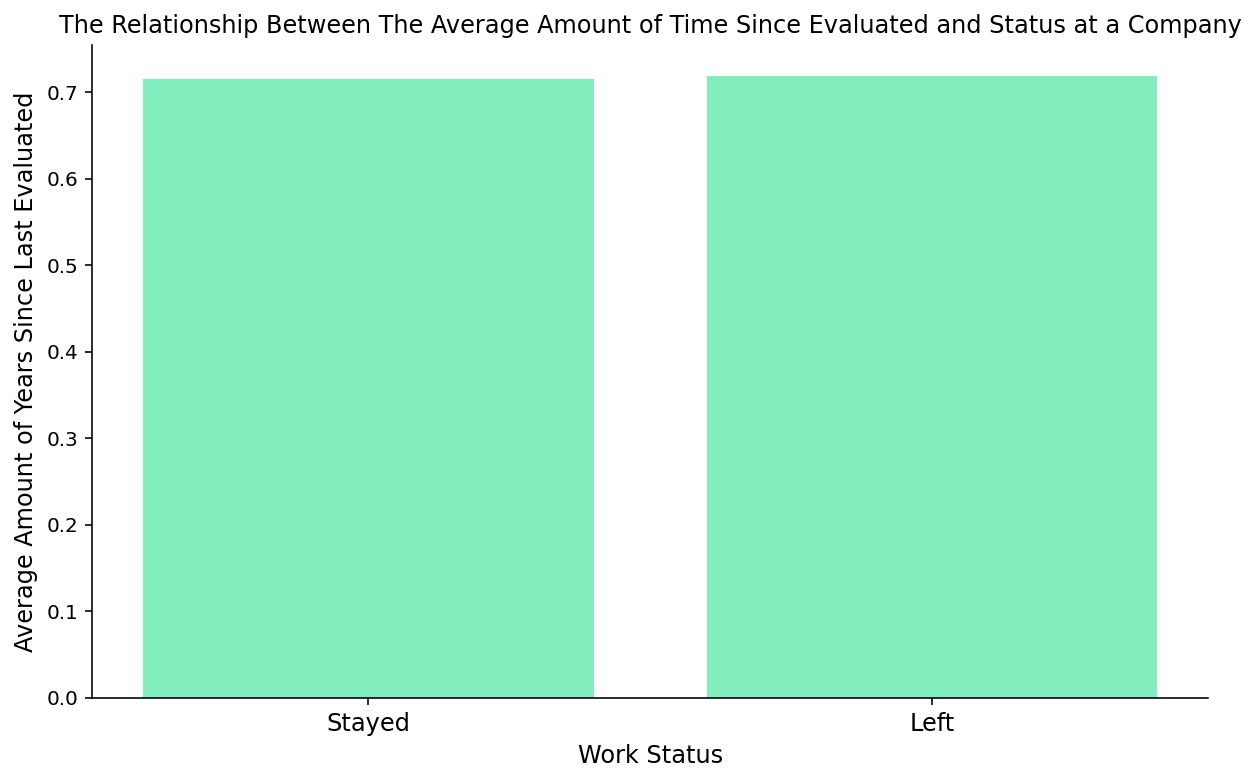

In [92]:
##Now lets do an EDA for last_evaluation: 

##first lets check if there are NA values 

count= sum(df_hr['last_evaluation'].isnull())
print(count)

##There are no NA values 

##now lets check the distribution, quantiles, and if there are extreme values 


##These quantiles look nomral given that this variable should be between 0 and 1 
print(df_hr['last_evaluation'].quantile([.0, 0.001, 0.25, .5, 0.75, 0.999, 1]))



##histogram 
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df_hr['last_evaluation'], bins=5)
ax.set_xlabel("Last Evaluation")
plt.show()

##check summary stats 
print(df_hr['last_evaluation'].describe())


##now we have check to make sure there are no NAs and no extreme values
##now lets start checking its relationship with the target

correlation = df_hr['last_evaluation'].corr(df_hr['left']) 
print(correlation)

##VERY SMALL CORRELATION: ALMOST NON-EXISTANT

##Lets graph this now 

##graph average satisfaction_level for left vs stayed


avg_last_eval = df_hr.groupby('left').mean()['last_evaluation']


fig, ax = plt.subplots(figsize=(10,6)) 
ax.bar(avg_last_eval.index, avg_last_eval, color="#82edbd")
plt.xlabel("Work Status", size=12)
plt.ylabel("Average Amount of Years Since Last Evaluated", size=12)

ax.set_xticks([0,1])
ax.set_xticklabels(['Stayed','Left'], size=12, color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)\

ax.set_title("The Relationship Between The Average Amount of Time Since Evaluated and Status at a Company")

plt.show()

fig.savefig('LastEvaluatedVSLeft.pdf')







In [105]:
#Processing of department and salary
df_data=pd.read_excel('HR_Employee_Data.xlsx')

In [106]:
df_data.columns

Index(['Emp_Id', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [107]:
df_data.head(2)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium


In [108]:
d=df_data[['Department','salary','number_project','left']].copy()
d.describe()

,number_project,left
count,14999.000000,14999.000000
mean,3.803054,0.238083
std,1.232592,0.425924
min,2.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,7.000000,1.000000


In [109]:
d.isnull().sum()

Department        0
salary            0
number_project    0
left              0
dtype: int64

In [110]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Department      14999 non-null  object
 1   salary          14999 non-null  object
 2   number_project  14999 non-null  int64 
 3   left            14999 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 468.8+ KB


In [111]:
#Convert salary to category
xco=d['salary'].value_counts()
xco

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

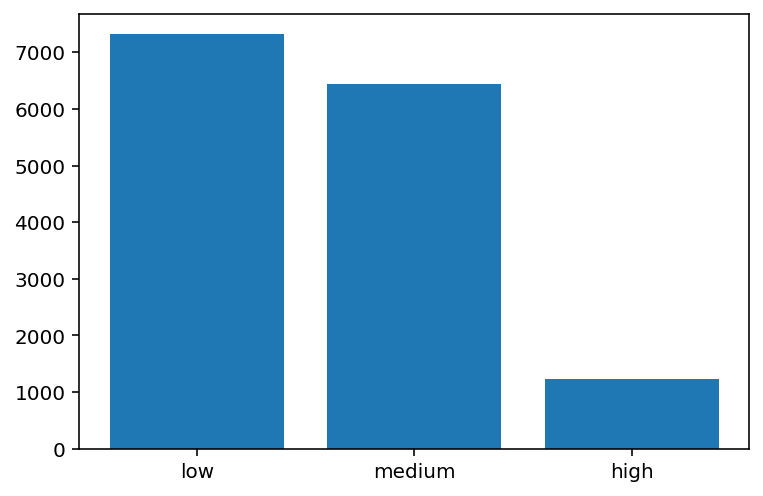

In [112]:
#Basic plot for salary
fig,ax=plt.subplots()
ax.bar(xco.index,xco)
plt.show()

In [113]:
#Group by salary abd get left and not left count
sal_left1=d[d['left']==1].groupby('salary').count()['left']
sal_left0=d[d['left']==0].groupby('salary').count()['left']
sal_left1,sal_left0

(salary
 high        82
 low       2172
 medium    1317
 Name: left, dtype: int64,
 salary
 high      1155
 low       5144
 medium    5129
 Name: left, dtype: int64)

In [117]:
# df_data=pd.read_excel('HR_Employee_Data.xlsx')

# df_data.columns

# df_data.head(2)

# d=df_data[['Department','salary','number_project','left']].copy()
# d.describe()

# d.isnull().sum()

# d.info()

# #Convert salary to category
# xco=d['salary'].value_counts()
# xco

# sal_left1=d[d['left']==1].groupby('salary').count()['left']
# sal_left0=d[d['left']==0].groupby('salary').count()['left']
# sal_left1,sal_left0

# per_sal=[sal_left1[i]/(sal_left0+sal_left1) for i in range(len(sal_left1))]
# per_sal=per_sal[::-1]
# per_sal

# fig,ax=plt.subplots()
# ax.bar(xco.index,xco)
# plt.show()

# fig, ax = plt.subplots(figsize=(4,4))
# w = .50 


# ax.barh(np.arange(3), sal_left0,  height=w, color='#1F78B4')
# ax.barh(np.arange(3), sal_left1,  height=w,left=sal_left0, color='#AD291C')



# ax.set_title('Salary vs Left',fontweight='bold',
#              color='black',fontsize=16,pad=20,x=0.07,y=1)
# ax.set_ylabel('Salary',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.set_xlabel('Employee Count',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.xaxis.set_label_coords(0.85,-0.1)
# ax.yaxis.set_label_coords(-0.15,0.9)


# ax.set_yticks(np.arange(3))
# ax.set_yticklabels(['High','Medium','Low'], fontsize=10,x=0)

# ax.tick_params(axis='y', left=False)

# # fig.text(0.4,0.85, 'Not Left', ha='center',color='#1F78B4',fontsize=10,weight='bold') 
# # fig.text(0.7,0.85, 'Left', ha='center',color='#AD291C',fontsize=10,weight='bold') 

# ax.set_facecolor('#fcfafa')
    
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


# for i in range(len(per_sal)):
# #     fig.text(0.92,0.77-i/3.4,f"{per_sal[i]*100:.0f}%",color='#AD291C',size=12,weight='bold')

# # fig.text(0.9,0.9,'% Left',fontweight='bold',
# #              color='black',fontsize=12)


# plt.show()



# d['salary']=d['salary'].astype('category')

# d['Department'].value_counts()

# col=d['Department'].unique()
# col

# d['Department']=d['Department'].astype('category')

# d.info()

# # d.groupby(['Department','']).count()['salary']

# co=d.groupby(['Department','salary']).count()['number_project']
# co

# co1=d.groupby(['Department','salary','left']).count()['number_project']
# co1

# dept_low0=co1[:,'low',0]
# dept_low1=co1[:,'low',1]
# dept_high=co1[:,'high',0]
# dept_mid=co1[:,'medium',0]
# dept_high1=co1[:,'high',1]
# dept_mid1=co1[:,'medium',1]

# fig, ax = plt.subplots(figsize=(10,6))
# w = .30 # Use 25% of each slot (day of week) per bar, leaving 25% for spacing

# ax.bar(np.arange(10)-w, dept_low0,  width=w, color='#2270e6', label="Low")
# ax.bar(np.arange(10)-w, dept_low1, bottom=dept_low0, width=w, color='red')
# ax.bar(np.arange(10), dept_mid  ,  width=w, color='#87c9c1', label="med")
# ax.bar(np.arange(10), dept_mid1, bottom=dept_mid, width=w, color='red')
# ax.bar(np.arange(10)+w, dept_high, width=w, color='#c9c287', label="high")
# ax.bar(np.arange(10)+w, dept_high1, bottom=dept_high, width=w, label="left",color='red')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_xticks(np.arange(10))
# ax.set_xticklabels(col,rotation=90)

# ax.set_title('Department wise people leaving Count',fontweight='bold',
#              color='black',fontsize=16,pad=50,x=0.1,y=1)
# ax.set_ylabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.set_xlabel('Department',fontname='serif',color='#47453d',weight='bold',fontsize=12)


# plt.legend() # use labels from bar() calls
# plt.show()

# percentage_low,percentage_mid,percentage_high={},{},{}
# for i in np.arange(10):
# #     print(dept_low0.index[i],dept_low1[i],dept_low0[i],dept_low1[i]/(dept_low1[i]+dept_low0[i]))
#     percentage_low[dept_low0.index[i]]=round((dept_low1[i]/(dept_low0[i]+dept_low1[i]))*100)
#     percentage_mid[dept_mid.index[i]]=round((dept_mid1[i]/(dept_mid[i]+dept_mid1[i]))*100)
#     percentage_high[dept_high.index[i]]=round((dept_high1[i]/(dept_high[i]+dept_high1[i]))*100)
# percentage_low.keys(),percentage_low.values()

# fig, ax = plt.subplots(figsize=(8,6))
# w = .60 

# ax.barh(np.arange(10), dept_low0,  height=w, color='#82659c', label="Not Left")
# ax.barh(np.arange(10), dept_low1, left=dept_low0, height=w, label="Left", color='#edaa77')


# ax.set_title('Department wise people leaving on Low salary',fontweight='bold',
#              color='black',fontsize=16,pad=50,x=0.1,y=1)
# ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
# ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.xaxis.set_label_coords(0.85,-0.07)
# ax.yaxis.set_label_coords(-0.09,1)

# ax.tick_params(axis='y', length=0)
# ax.set_yticks(np.arange(10))
# ax.set_yticklabels(percentage_low.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

# counter=0
# temp=[]
# per_val=list(percentage_low.values())
# #add count values to bars and total count on the right
# for i, rect in enumerate(ax.patches):
#     h = rect.get_height() #height of each bar
#     w = rect.get_width()
#     y = rect.get_y()+h/2.6 
#     if(i>=10):
#         ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+30, y),color='#edaa77',size=12)
#         counter+=1
#     else:
#         temp.append(rect.get_width())

        

        
# # hide border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_bounds(-1, 9.5)
# ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
# # 
# plt.show()

# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
# ax[0].bar(d['salary'], d['left'], width=0.68) #leave space around 0.32

# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].spines['left'].set_linewidth(.5)
# ax[0].spines['bottom'].set_linewidth(.5)

# ax[0].set_ylabel("Avg MPG")

# # ax[0].set_xticks(cyl)                     
# # ax[0].set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=45) 

# ax[1].bar(d['salary'], d['left'], color='#8298ba', width=0.68) 

# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax[1].spines['left'].set_linewidth(.5)
# ax[1].spines['bottom'].set_linewidth(.5)

# ax[1].set_ylabel("Avg MPG")

# # ax[1].set_xticks(cyl)                     
# # ax[1].set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=90) 
# plt.show()

# fig, ax = plt.subplots(figsize=(10,6))
# w = .60 

# ax.barh(np.arange(10), dept_high, height=w, color='#82659c', label="Not Left")
# ax.barh(np.arange(10), dept_high1, left=dept_high, height=w, label="Left", color='#edaa77')


# ax.set_title('Department wise people leaving on High salary',fontweight='bold',
#              color='black',fontsize=16,pad=50,x=0.1,y=1)
# ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
# ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.xaxis.set_label_coords(0.85,-0.07)
# ax.yaxis.set_label_coords(-0.09,1)

# ax.tick_params(axis='y', length=0)
# ax.set_yticks(np.arange(10))
# ax.set_yticklabels(percentage_high.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

# counter=0
# temp=[]
# per_val=list(percentage_high.values())
# #add count values to bars and total count on the right
# for i, rect in enumerate(ax.patches):
#     h = rect.get_height() #height of each bar
#     w = rect.get_width()
#     y = rect.get_y()+h/2.6 
#     if(i>=10):
#         ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+6, y),color='#edaa77',size=12)
#         counter+=1
#     else:
#         temp.append(rect.get_width())

        

        
# # hide border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_bounds(-1, 9.5)
# ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
# plt.show()

# fig, ax = plt.subplots(figsize=(10,6))
# w = .60 

# ax.barh(np.arange(10), dept_mid, height=w, color='#82659c', label="Not Left")
# ax.barh(np.arange(10), dept_mid1, left=dept_mid, height=w, label="Left", color='#edaa77')


# ax.set_title('Department wise people leaving on Medium salary',fontweight='bold',
#              color='black',fontsize=16,pad=50,x=0.1,y=1)
# ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
# ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
# ax.xaxis.set_label_coords(0.85,-0.07)
# ax.yaxis.set_label_coords(-0.09,1)

# ax.tick_params(axis='y', length=0)
# ax.set_yticks(np.arange(10))
# ax.set_yticklabels(percentage_mid.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

# counter=0
# temp=[]
# per_val=list(percentage_mid.values())
# #add count values to bars and total count on the right
# for i, rect in enumerate(ax.patches):
#     h = rect.get_height() #height of each bar
#     w = rect.get_width()
#     y = rect.get_y()+h/2.6 
#     if(i>=10):
#         ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+22, y),color='#edaa77',size=12)
#         counter+=1
#     else:
#         temp.append(rect.get_width())

        

        
# # hide border
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_bounds(-1, 9.5)
# ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
# plt.show()

# co[:,'high']

# fig, ax = plt.subplots(figsize=(8,6))
# w = .25 # Use 25% of each slot (day of week) per bar, leaving 25% for spacing

# ax.bar(np.arange(10)-w, co[:,'high'],  width=w, color='#2270e6', label="high")
# ax.bar(np.arange(10),   co[:,'medium'],  width=w, color='#a9b9d1', label="med")
# ax.bar(np.arange(10)+w, co[:,'low'], width=w, color='#c7d4ce', label="low")

# ax.set_xticks(np.arange(10))
# ax.set_xticklabels(col,rotation=90)

# plt.legend() # use labels from bar() calls
# plt.show()

# d['left'].value_counts()

# d['salary'] = pd.Categorical(d['salary'], categories=d['salary'].unique()).codes



# d['salary'].value_counts()

# d[['salary','left']].corr()

# d['Department'] = pd.Categorical(d['Department'], categories=d['Department'].unique()).codes

# d['salary'].value_counts()

# d[['Department','left']].corr()

# #regression slope and intercept values
# b, a = np.polyfit(d['salary'], d['left'], 1)
# b,a

In [118]:
per_sal=[sal_left1[i]/(sal_left0[i]+sal_left1[i]) for i in range(len(sal_left1))]
per_sal=per_sal[::-1]
per_sal

[0.20431275209432206, 0.2968835429196282, 0.06628940986257073]

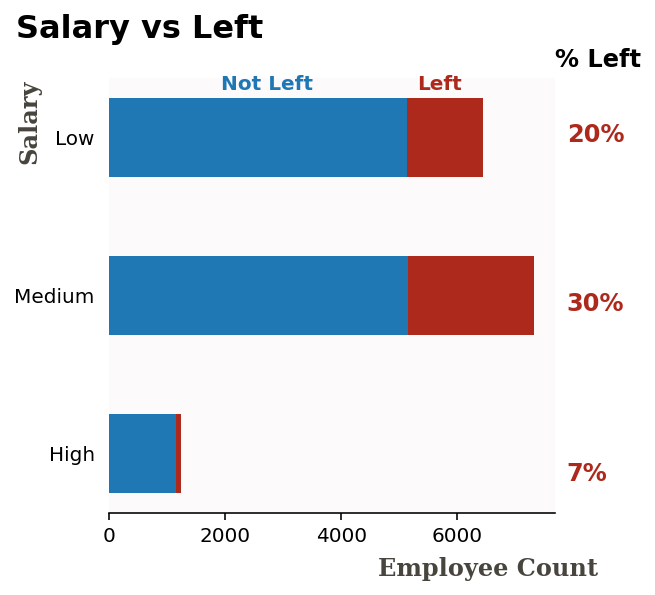

In [119]:
fig, ax = plt.subplots(figsize=(4,4))
w = .50 


ax.barh(np.arange(3), sal_left0,  height=w, color='#1F78B4')
ax.barh(np.arange(3), sal_left1,  height=w,left=sal_left0, color='#AD291C')



ax.set_title('Salary vs Left',fontweight='bold',
             color='black',fontsize=16,pad=20,x=0.07,y=1)
ax.set_ylabel('Salary',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.set_xlabel('Employee Count',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.xaxis.set_label_coords(0.85,-0.1)
ax.yaxis.set_label_coords(-0.15,0.9)


ax.set_yticks(np.arange(3))
ax.set_yticklabels(['High','Medium','Low'], fontsize=10,x=0)

ax.tick_params(axis='y', left=False)

fig.text(0.4,0.86, 'Not Left', ha='center',color='#1F78B4',fontsize=10,weight='bold') 
fig.text(0.7,0.86, 'Left', ha='center',color='#AD291C',fontsize=10,weight='bold') 

ax.set_facecolor('#fcfafa')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


for i in range(len(per_sal)):
    fig.text(0.92,0.77-i/3.4,f"{per_sal[i]*100:.0f}%",color='#AD291C',size=12,weight='bold')

fig.text(0.9,0.9,'% Left',fontweight='bold',
             color='black',fontsize=12)


plt.show()

In [120]:
d['salary']=d['salary'].astype('category')

In [121]:
d['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [122]:
col=d['Department'].unique()
col

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [123]:
d['Department']=d['Department'].astype('category')

In [124]:
co=d.groupby(['Department','salary']).count()['number_project']
co

Department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: number_project, dtype: int64

In [125]:
co1=d.groupby(['Department','salary','left']).count()['number_project']
co1

Department   salary  left
IT           high    0         79
                     1          4
             low     0        437
                     1        172
             medium  0        438
                     1         97
RandD        high    0         47
                     1          4
             low     0        309
                     1         55
             medium  0        310
                     1         62
accounting   high    0         69
                     1          5
             low     0        259
                     1         99
             medium  0        235
                     1        100
hr           high    0         39
                     1          6
             low     0        243
                     1         92
             medium  0        242
                     1        117
management   high    0        224
                     1          1
             low     0        121
                     1         59
             medium  0

In [126]:
dept_low0=co1[:,'low',0]
dept_low1=co1[:,'low',1]
dept_high=co1[:,'high',0]
dept_mid=co1[:,'medium',0]
dept_high1=co1[:,'high',1]
dept_mid1=co1[:,'medium',1]

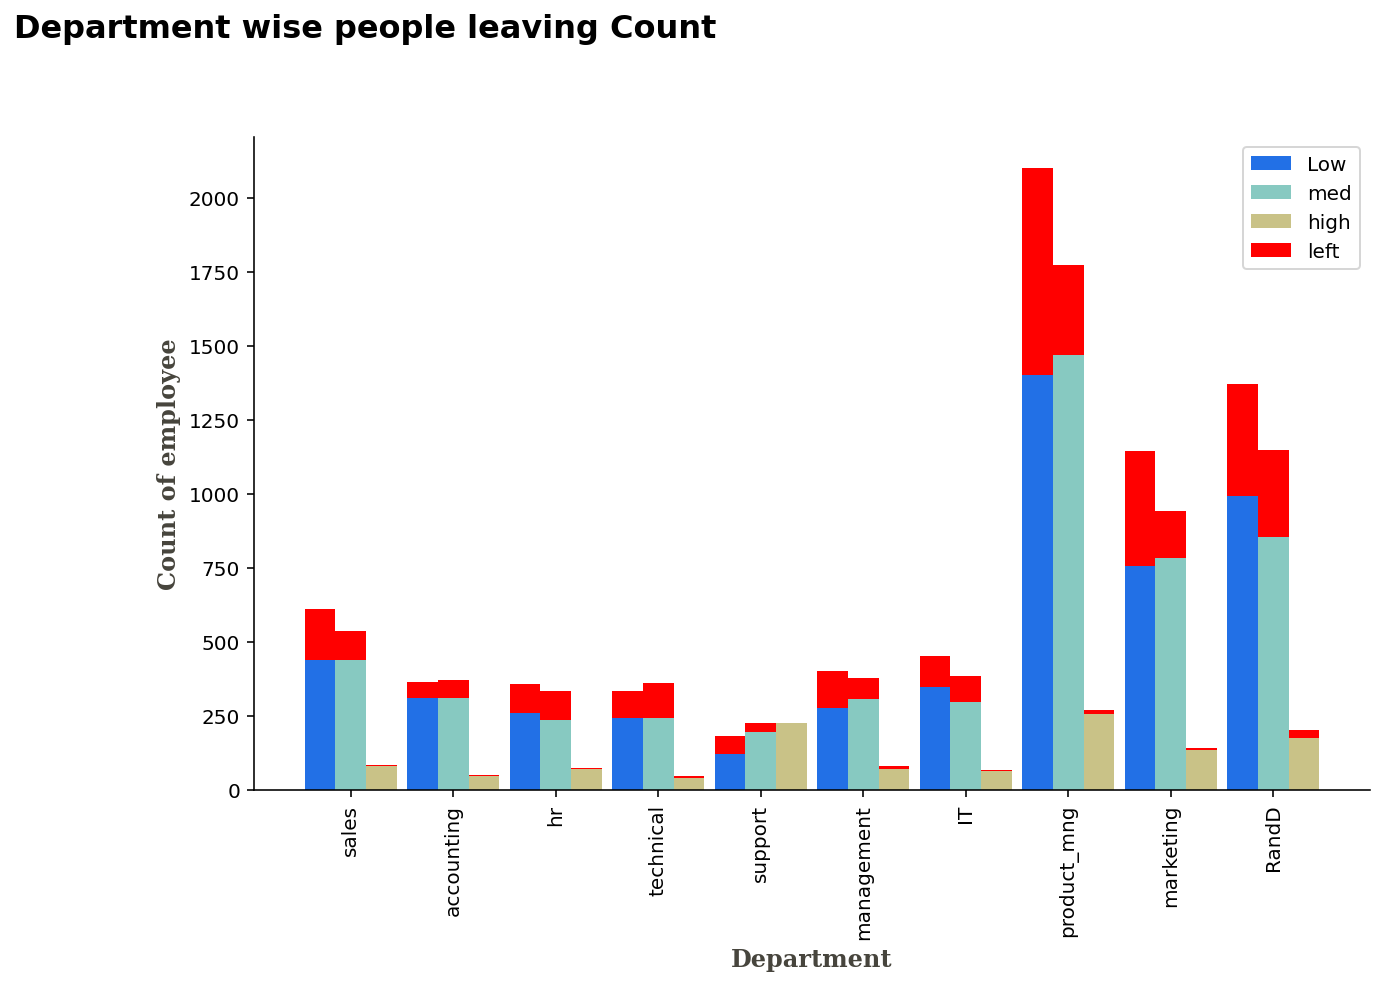

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
w = .30 # Use 25% of each slot (day of week) per bar, leaving 25% for spacing

ax.bar(np.arange(10)-w, dept_low0,  width=w, color='#2270e6', label="Low")
ax.bar(np.arange(10)-w, dept_low1, bottom=dept_low0, width=w, color='red')
ax.bar(np.arange(10), dept_mid  ,  width=w, color='#87c9c1', label="med")
ax.bar(np.arange(10), dept_mid1, bottom=dept_mid, width=w, color='red')
ax.bar(np.arange(10)+w, dept_high, width=w, color='#c9c287', label="high")
ax.bar(np.arange(10)+w, dept_high1, bottom=dept_high, width=w, label="left",color='red')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(col,rotation=90)

ax.set_title('Department wise people leaving Count',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax.set_ylabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.set_xlabel('Department',fontname='serif',color='#47453d',weight='bold',fontsize=12)


plt.legend() # use labels from bar() calls
plt.show()

In [128]:
percentage_low,percentage_mid,percentage_high={},{},{}
for i in np.arange(10):
#     print(dept_low0.index[i],dept_low1[i],dept_low0[i],dept_low1[i]/(dept_low1[i]+dept_low0[i]))
    percentage_low[dept_low0.index[i]]=round((dept_low1[i]/(dept_low0[i]+dept_low1[i]))*100)
    percentage_mid[dept_mid.index[i]]=round((dept_mid1[i]/(dept_mid[i]+dept_mid1[i]))*100)
    percentage_high[dept_high.index[i]]=round((dept_high1[i]/(dept_high[i]+dept_high1[i]))*100)
percentage_low.keys(),percentage_low.values()

(dict_keys(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing', 'product_mng', 'sales', 'support', 'technical']),
 dict_values([28, 15, 28, 27, 33, 31, 23, 33, 34, 28]))

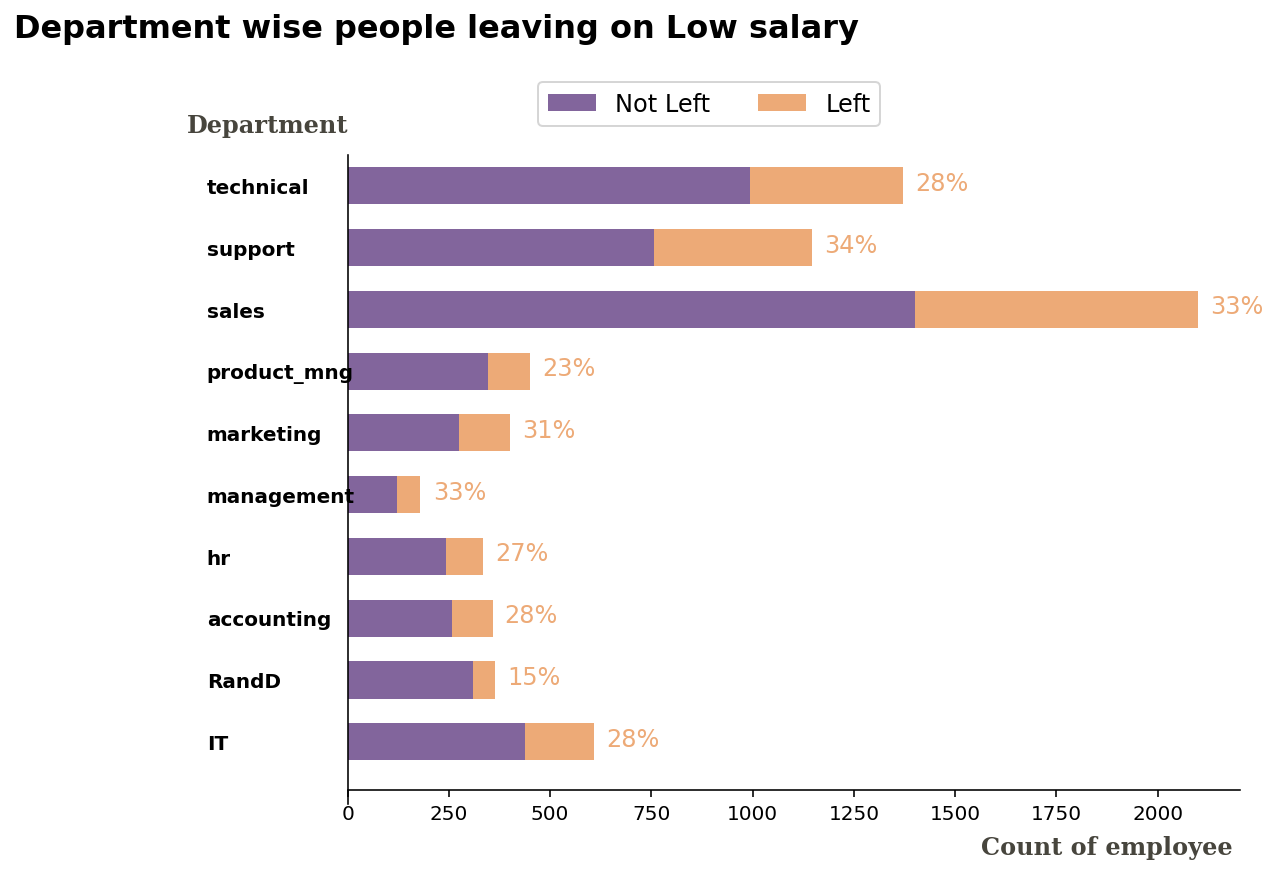

In [129]:
fig, ax = plt.subplots(figsize=(8,6))
w = .60 

ax.barh(np.arange(10), dept_low0,  height=w, color='#82659c', label="Not Left")
ax.barh(np.arange(10), dept_low1, left=dept_low0, height=w, label="Left", color='#edaa77')


ax.set_title('Department wise people leaving on Low salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.xaxis.set_label_coords(0.85,-0.07)
ax.yaxis.set_label_coords(-0.09,1)

ax.tick_params(axis='y', length=0)
ax.set_yticks(np.arange(10))
ax.set_yticklabels(percentage_low.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

counter=0
temp=[]
per_val=list(percentage_low.values())
#add count values to bars and total count on the right
for i, rect in enumerate(ax.patches):
    h = rect.get_height() #height of each bar
    w = rect.get_width()
    y = rect.get_y()+h/2.6 
    if(i>=10):
        ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+30, y),color='#edaa77',size=12)
        counter+=1
    else:
        temp.append(rect.get_width())

        

        
# hide border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(-1, 9.5)
ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
# 
plt.show()

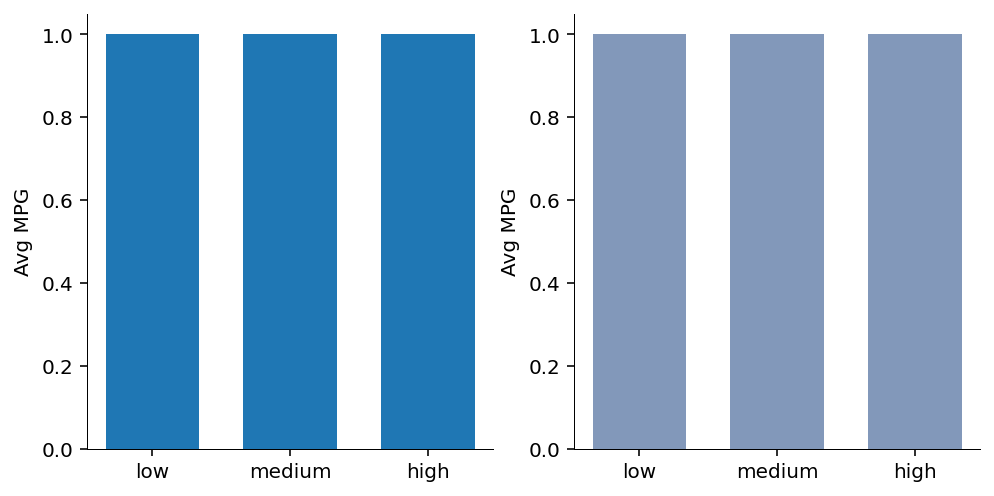

In [130]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4)) 
ax[0].bar(d['salary'], d['left'], width=0.68) #leave space around 0.32

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_linewidth(.5)
ax[0].spines['bottom'].set_linewidth(.5)

ax[0].set_ylabel("Avg MPG")

# ax[0].set_xticks(cyl)                     
# ax[0].set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=45) 

ax[1].bar(d['salary'], d['left'], color='#8298ba', width=0.68) 

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_linewidth(.5)
ax[1].spines['bottom'].set_linewidth(.5)

ax[1].set_ylabel("Avg MPG")

# ax[1].set_xticks(cyl)                     
# ax[1].set_xticklabels([f'Cylinder-{n}' for n in cyl], rotation=90) 
plt.show()

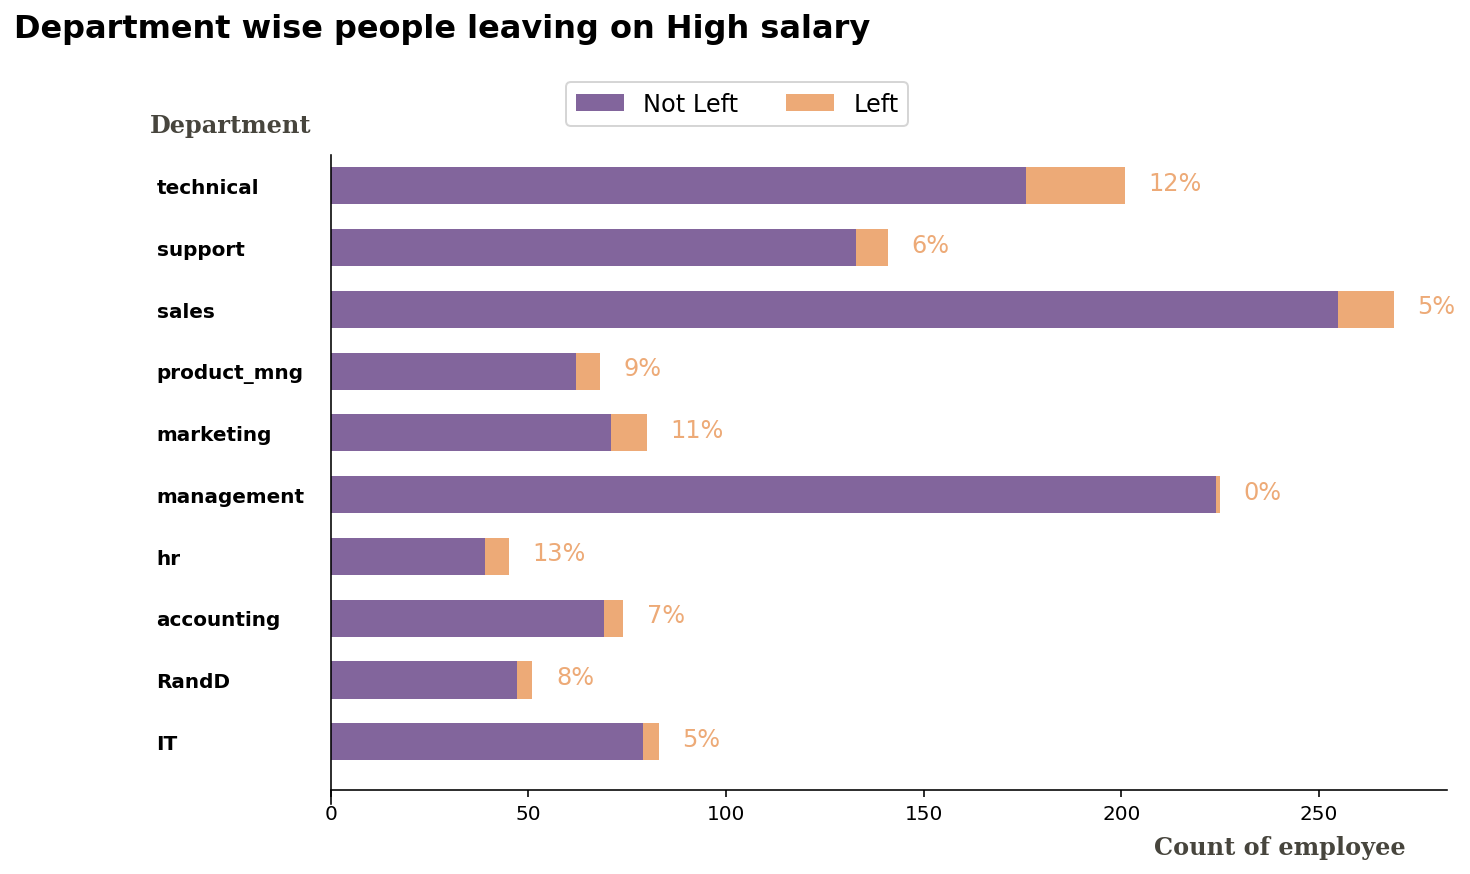

In [131]:
fig, ax = plt.subplots(figsize=(10,6))
w = .60 

ax.barh(np.arange(10), dept_high, height=w, color='#82659c', label="Not Left")
ax.barh(np.arange(10), dept_high1, left=dept_high, height=w, label="Left", color='#edaa77')


ax.set_title('Department wise people leaving on High salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.xaxis.set_label_coords(0.85,-0.07)
ax.yaxis.set_label_coords(-0.09,1)

ax.tick_params(axis='y', length=0)
ax.set_yticks(np.arange(10))
ax.set_yticklabels(percentage_high.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

counter=0
temp=[]
per_val=list(percentage_high.values())
#add count values to bars and total count on the right
for i, rect in enumerate(ax.patches):
    h = rect.get_height() #height of each bar
    w = rect.get_width()
    y = rect.get_y()+h/2.6 
    if(i>=10):
        ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+6, y),color='#edaa77',size=12)
        counter+=1
    else:
        temp.append(rect.get_width())

        

        
# hide border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(-1, 9.5)
ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
plt.show()

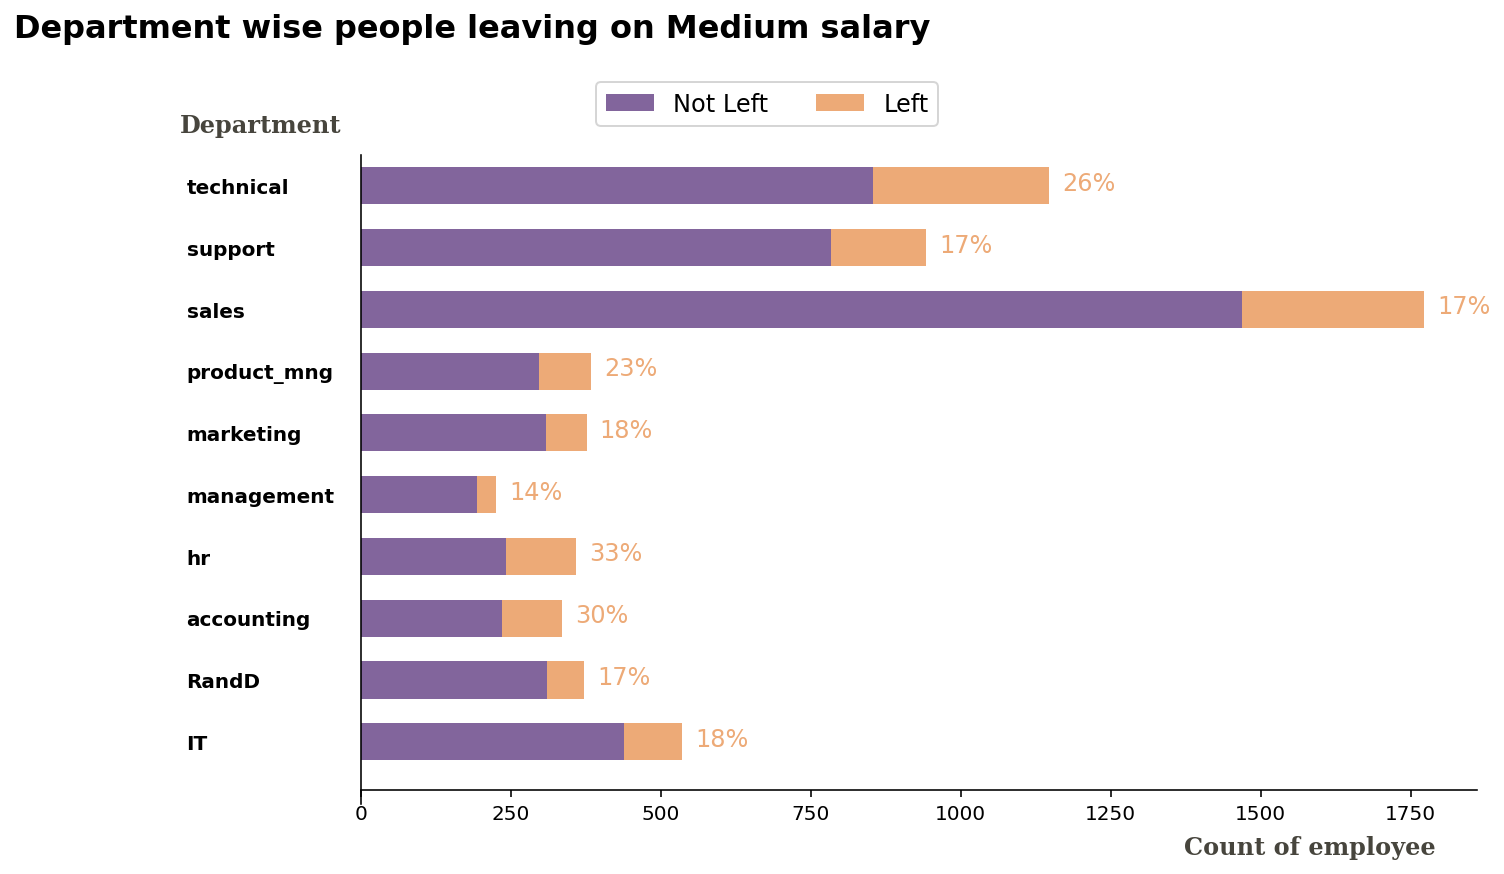

In [132]:
fig, ax = plt.subplots(figsize=(10,6))
w = .60 

ax.barh(np.arange(10), dept_mid, height=w, color='#82659c', label="Not Left")
ax.barh(np.arange(10), dept_mid1, left=dept_mid, height=w, label="Left", color='#edaa77')


ax.set_title('Department wise people leaving on Medium salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax.set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=12)
ax.set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax.xaxis.set_label_coords(0.85,-0.07)
ax.yaxis.set_label_coords(-0.09,1)

ax.tick_params(axis='y', length=0)
ax.set_yticks(np.arange(10))
ax.set_yticklabels(percentage_mid.keys(),ha='left', fontsize=10,weight='bold',x=-0.15)

counter=0
temp=[]
per_val=list(percentage_mid.values())
#add count values to bars and total count on the right
for i, rect in enumerate(ax.patches):
    h = rect.get_height() #height of each bar
    w = rect.get_width()
    y = rect.get_y()+h/2.6 
    if(i>=10):
        ax.annotate(f"{per_val[counter]}%", (temp[i-10]+w+22, y),color='#edaa77',size=12)
        counter+=1
    else:
        temp.append(rect.get_width())

        

        
# hide border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_bounds(-1, 9.5)
ax.legend(bbox_to_anchor=(0.2, 1), ncol=2, prop={'size': 12}) 
plt.show()

In [133]:
co[:,'high']

Department
IT              83
RandD           51
accounting      74
hr              45
management     225
marketing       80
product_mng     68
sales          269
support        141
technical      201
Name: number_project, dtype: int64

In [134]:
d['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [135]:
d['salary'] = pd.Categorical(d['salary'], categories=d['salary'].unique()).codes

In [136]:
d[['salary','left']].corr()

,salary,left
salary,1.000000,-0.157898
left,-0.157898,1.000000


In [137]:
d['Department'] = pd.Categorical(d['Department'], categories=d['Department'].unique()).codes

In [147]:
leftper = d.groupby("Department").mean()["left"]
total = 1

In [148]:
per_left_dept=(leftper/total)*100

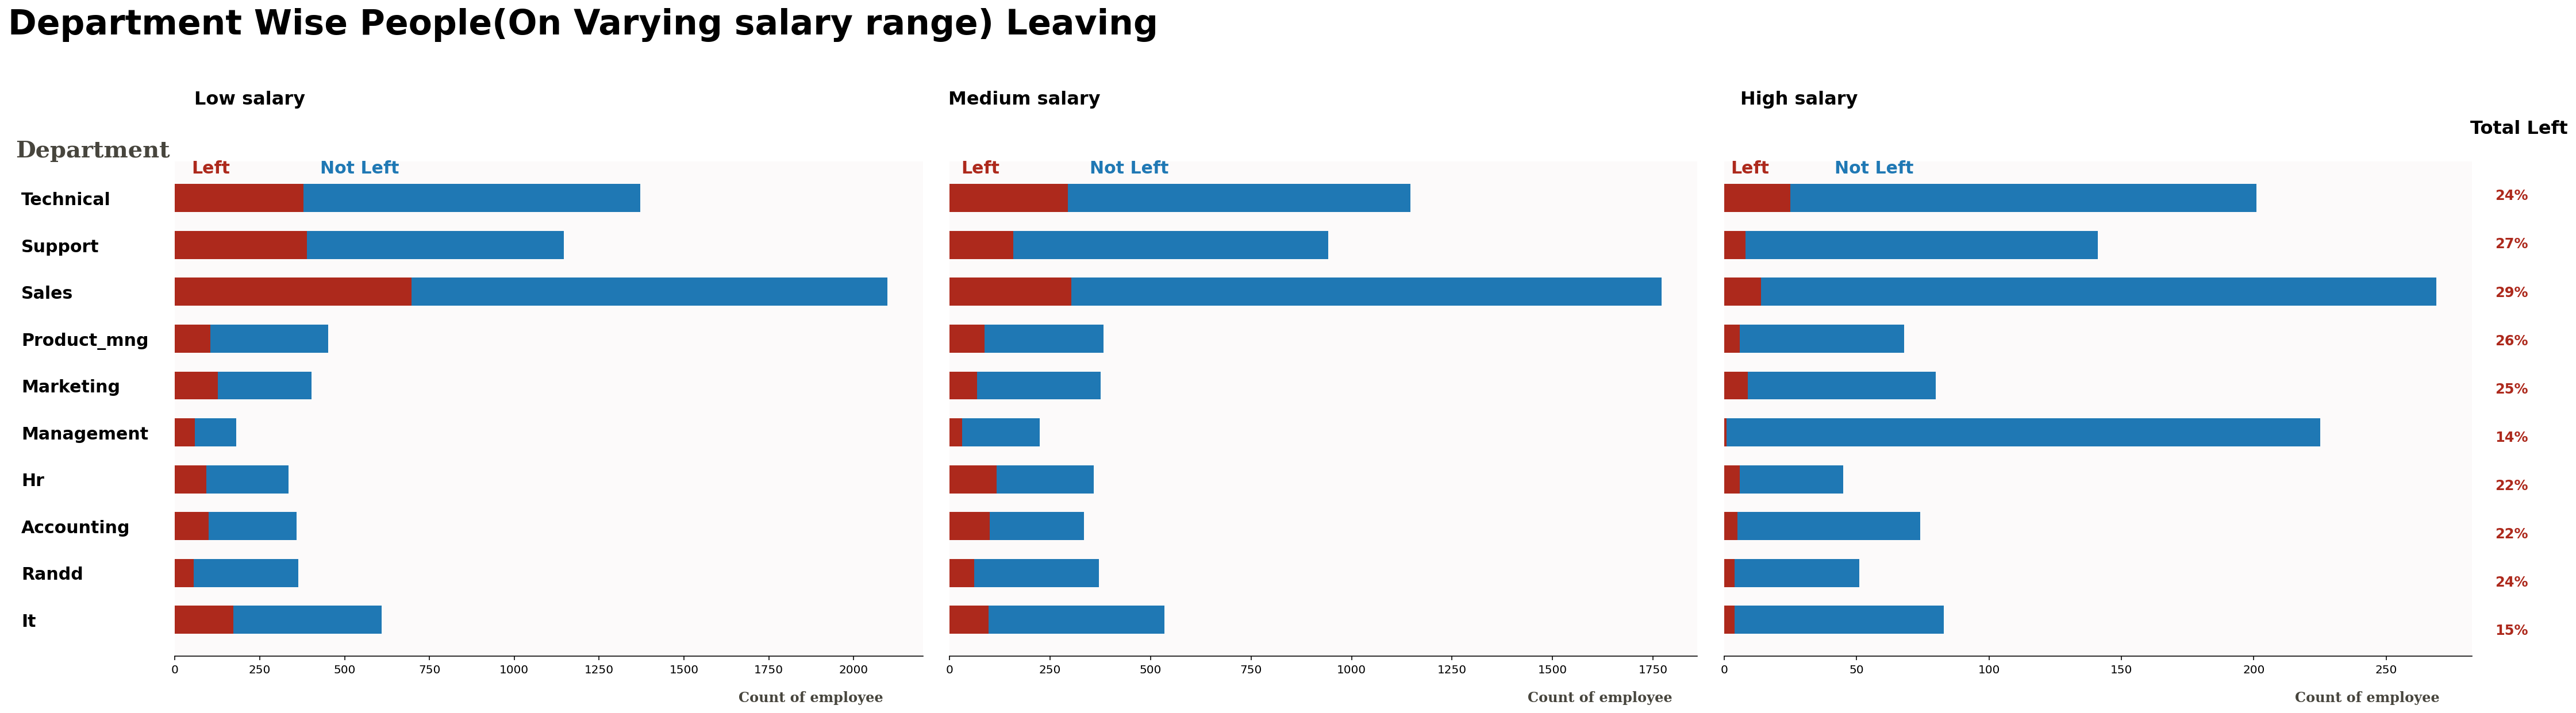

In [149]:
import matplotlib.patches as patches
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

############# 2020 ###################

w = .60 
ax[0].barh(np.arange(10), dept_low1,  height=w, color='#AD291C', label="Left")
ax[0].barh(np.arange(10), dept_low0, left=dept_low1, height=w, label="Not Left", color='#1F78B4')
column_val=[val.capitalize() for val in percentage_low.keys()]

ax[0].set_title('Low salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax[0].set_ylabel('Department',fontname='serif',color='#47453d',weight='bold',rotation='horizontal',fontsize=20)
ax[0].set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax[0].xaxis.set_label_coords(0.85,-0.07)
ax[0].yaxis.set_label_coords(-0.11,1)

ax[0].tick_params(axis='y', length=0)
ax[0].set_yticks(np.arange(10))
ax[0].set_yticklabels(column_val,ha='left', fontsize=15,weight='bold',x=-0.2)
ax[0].set_facecolor("#fcfafa")


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].spines['left'].set_visible(False)
ax[0].spines['left'].set_bounds(-1, 9.5)

fig.text(0.08,0.84, 'Left', ha='center',color='#AD291C',fontsize=15,weight='bold') 

fig.text(0.14,0.84, 'Not Left', ha='center',color='#1F78B4',fontsize=15,weight='bold')


#####################################

w = .60 

ax[1].barh(np.arange(10), dept_mid1, height=w, color='#AD291C', label="Left")
ax[1].barh(np.arange(10), dept_mid, left=dept_mid1, height=w, label="Not Left", color='#1F78B4')


ax[1].set_title('Medium salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax[1].set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax[1].xaxis.set_label_coords(0.87,-0.07)

ax[1].tick_params(axis='y', length=0)
ax[1].set_yticks([])



ax[1].set_facecolor("#fcfafa")
        
# hide border
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].spines['left'].set_visible(False)
ax[1].spines['left'].set_bounds(-1, 9.5)

fig.text(0.45,0.84, 'Not Left', ha='center',color='#1F78B4',fontsize=15,weight='bold') 
fig.text(0.39,0.84, 'Left', ha='center',color='#AD291C',fontsize=15,weight='bold') 

#################################
w = .60 

ax[2].barh(np.arange(10), dept_high1, height=w, color='#AD291C', label="Left")
ax[2].barh(np.arange(10), dept_high, left=dept_high1, height=w, label="Not Left", color='#1F78B4')


ax[2].set_title('High salary',fontweight='bold',
             color='black',fontsize=16,pad=50,x=0.1,y=1)
ax[2].set_xlabel('Count of employee',fontname='serif',color='#47453d',weight='bold',fontsize=12)
ax[2].xaxis.set_label_coords(0.86,-0.07)

ax[2].tick_params(axis='y', length=0)
ax[2].set_yticks([])

fig.text(0.75,0.84, 'Not Left', ha='center',color='#1F78B4',fontsize=15,weight='bold') 
fig.text(0.7,0.84, 'Left', ha='center',color='#AD291C',fontsize=15,weight='bold') 

ax[2].set_facecolor("#fcfafa")       

        
# hide border
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[2].spines['left'].set_visible(False)
ax[2].spines['left'].set_bounds(-1, 9.5) 

fig.text(0.23,1.05, 'Department Wise People(On Varying salary range) Leaving', ha='center',color='black',fontsize=30,weight='bold') 



for i in range(len(per_left_dept)):
    fig.text(1,0.80-i/13.7,f"{per_left_dept[i]:.0f}%",color='#AD291C',size=12,weight='bold')

fig.text(0.99,0.9,'Total Left',fontweight='bold',
             color='black',fontsize=16)





plt.subplots_adjust(top=0.88)
plt.tight_layout(pad=2)
# plt.show()
plt.savefig('department.png',pad=0.2)